# Model Building Phase - Car Price Prediction Project Part


### Problem Statement:

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model. This project contains two phase

### Data Collection Phase:

You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. 
more the data better the model
In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 
etc.) You need web scraping for this. You have to fetch data for different locations. The number of
columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are 
Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and 
at last target variable Price of the car. This data is to give you a hint about important variables in 
used car model. You can make changes to it, you can add or you can remove some columns, it 
completely depends on the website from which you are fetching the data.
Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, 
Hatchback.


### Model Building Phase

After collecting the data, you need to build a machine learning model. Before model building do all 
data pre-processing steps. Try different models with different hyper parameters and select the best 
model.

Follow the complete life cycle of data science. Include all the steps like.
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model


The data of used cars is scraped  from  **Cardekho** website.

## Machine learning model building phase:

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [2]:
# import train data and check 5 different samples

data = pd.read_excel('Final_Scraped_Details.xlsx')
data.sample(n=5)

,Model,Manufactring_year,Kilometers_driven,Fuel_Type,Ownership,Transmission,Insurance_Validity,Seats,RTO,Engine_displacement,...,No_of_cylinder,Turbo_charger,Length_mm,Width_mm,Height_mm,Wheel_Base_mm,Front_Brake_Type,Steering_Type,Tyre_Type,Price_Rs
3547,Maruti Baleno 1.2 CVT Zeta,2017.0,69517,Diesel,First Owner,Manual,Third Party insurance,5.0,MH43,1248.0,...,4,Yes,4300.0,1785,1595,2600,Ventilated Disc,Power,"Tubeless,Radial",8.23 Lakh
1895,Hyundai i10 Sportz,2018.0,18773,Petrol,First Owner,Automatic,Third Party insurance,5.0,HR26,1497.0,...,4,NaN,4390.0,1695,1495,2450,Ventilated Disc,Power,"Tubeless,Radial",10.75 Lakh
1987,Jaguar XF 2.2 Litre Luxury,2011.0,65000,Petrol,First Owner,Manual,Comprehensive,5.0,DL3C,1498.0,...,NaN,NaN,4425.0,1695,1505,2600,Ventilated Disc,Power,NaN,2.70 Lakh
123,Mercedes-Benz C-Class C 220 CDI Avantgarde,2022.0,18000,Diesel,First Owner,Automatic,Comprehensive,4.0,GJ38,2184.0,...,4,--,3985.0,1855,1844,2450,Drum,Power,NaN,17.51 Lakh
1725,Tata Tiago 1.2 Revotron XZA,2014.0,96000,Diesel,First Owner,Automatic,Comprehensive,5.0,HR26,1968.0,...,4,Yes,4701.0,2040,1427,2808,Ventilated Disc,Power,"Tubeless,Radial",12.10 Lakh


## Data Cleaning

In [3]:
print('No. of Rows :',data.shape[0])
print('No. of Columns :',data.shape[1])
pd.set_option('display.max_columns',None)
data.sample(n=6)

No. of Rows : 5467
No. of Columns : 25


,Model,Manufactring_year,Kilometers_driven,Fuel_Type,Ownership,Transmission,Insurance_Validity,Seats,RTO,Engine_displacement,Milage_kmpl,Torque_nm,Color,Max_Torque,Engine_Type,No_of_cylinder,Turbo_charger,Length_mm,Width_mm,Height_mm,Wheel_Base_mm,Front_Brake_Type,Steering_Type,Tyre_Type,Price_Rs
2456,Maruti Wagon R LXI BS IV,2017.0,25664,Petrol,First Owner,Manual,Third Party insurance,5.0,TS07,1197.0,21.4,115,Grey,115Nm@4000rpm,VVT Petrol Engine,4,No,3995.0,1745,1510,2520,Disc,Power,"Tubeless,Radial",6.78 Lakh
5380,Toyota Corolla Altis G,2016.0,57000,CNG,First Owner,Manual,Third Party insurance,4.0,DL9C,796.0,33.44,60,Silver,60Nm@3500rpm,F8D Engine,3,No,3430.0,1490,1475,2360,Solid Disc,Power,Tubeless,2.75 Lakh
1149,Maruti Baleno 1.2 CVT Delta,2015.0,65011,Electric,First Owner,Automatic,Not Available,5.0,MH01,2494.0,19.16,213,Grey,213Nm@4500rpm,2AR-FXE Petrol Engine,4,No,4850.0,1825,1480,2775,Ventilated Disc,Power,"Tubeless,Radial",13.51 Lakh
5014,Ford Ikon 1.3 Flair,2008.0,128000,Diesel,Fourth Owner,Manual,NaN,5.0,NaN,1248.0,17.8,5,Red,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Tubeless,Radial",1.70 Lakh
5436,Maruti Wagon R LXI,2017.0,63000,Petrol,First Owner,Manual,Comprehensive,5.0,DL12,1199.0,23.84,114,Silver,114Nm@3500rpm,Revotron Engine,3,NaN,3746.0,1647,1535,2400,Disc,Power,Tubeless,4.10 Lakh
1260,Hyundai Grand i10 Sportz,2019.0,34000,Diesel,Second Owner,Manual,Third Party insurance,7.0,KA01,1493.0,18.49,240,White,240Nm@1600-2800rpm,mHawk 100 Diesel Engine,3,No,3995.0,1835,1826,2680,Disc,Power,"Tubeless,Radial",9.75 Lakh


In [4]:
data.columns.to_series().groupby(data.dtypes).groups

{float64: ['Manufactring_year', 'Seats', 'Engine_displacement', 'Length_mm'], object: ['Model', 'Kilometers_driven', 'Fuel_Type', 'Ownership', 'Transmission', 'Insurance_Validity', 'RTO', 'Milage_kmpl', 'Torque_nm', 'Color', 'Max_Torque', 'Engine_Type', 'No_of_cylinder', 'Turbo_charger', 'Width_mm', 'Height_mm', 'Wheel_Base_mm', 'Front_Brake_Type', 'Steering_Type', 'Tyre_Type', 'Price_Rs']}

1. This dataset contain 5467 rows and 25 columns.
2. Our target feature is Price_Rs.
3. Most of the features are categorical.

### Feature engineering:



In [5]:
data.isin([' --','null','NA',' ']).sum().any()

True

In [6]:
data.replace(' --',np.nan, inplace = True)
data.replace('null',np.nan, inplace= True)
data.replace('NA',np.nan, inplace= True)
data.replace(' ', np.nan, inplace = True)

#### Target variable (Price_Rs):

In [7]:
data['Price_Rs'].isna().sum()

0

In [8]:
data['Price_Rs'].dtype

dtype('O')

In [9]:
data['Price_Rs'].unique()

array(['10.03 Lakh', '12.83 Lakh', '16.40 Lakh', ..., '46.33 Lakh',
       '10.47 Lakh', '17.40 Lakh'], dtype=object)

In [10]:
data['Price_Rs'] = data['Price_Rs'].str.replace('Lakh','100000')
data['Price_Rs'] = data['Price_Rs'].str.replace('Crore','10000000')
data['Price_Rs']= data['Price_Rs'].str.replace(',','')

In [11]:
data[['a','b']] = data['Price_Rs'].str.split(expand=True)

In [12]:
data['b'].unique()

array(['100000', '10000000', None], dtype=object)

In [13]:
data['a'] = data['a'].astype('float')
data['b'] = data['b'].astype('float')

In [14]:
data['b'] = data['b'].fillna(value = 1)

In [15]:
data["Price_Rs."] = data['a'] * data['b']

In [16]:
data['Price_Rs.'].dtype

dtype('float64')

In [17]:
data.drop(columns=['Price_Rs','a','b'], inplace = True)

### Kilometers_driven:

In [18]:
data['Kilometers_driven'].nunique()

3016

In [19]:
data['Kilometers_driven'].isin([' --']).sum()

0

In [20]:
data['Kilometers_driven'] =pd.to_numeric(data['Kilometers_driven'])

In [21]:
data['Kilometers_driven'].dtype

dtype('float64')

### Milage_kmpl:


In [22]:
data['Milage_kmpl'] =pd.to_numeric(data['Milage_kmpl'])

In [23]:
data['Milage_kmpl'].dtype

dtype('float64')

### Torque_nm:

In [24]:
data['Torque_nm'] =pd.to_numeric(data['Torque_nm'])

In [25]:
data['Torque_nm'].dtype

dtype('float64')

### No_of_cylinder:

In [26]:
data['No_of_cylinder'].unique()

array(['4', 4, '3', '6', '8', nan, '2', '5', '7', '10'], dtype=object)

In [27]:
data['No_of_cylinder'] =pd.to_numeric(data['No_of_cylinder'])

In [28]:
data['No_of_cylinder'].dtype

dtype('float64')

### Turbo_charger:

In [29]:
data['Turbo_charger'].unique()

array(['Yes', 'No', nan, 'yes', 'Twin'], dtype=object)

In [30]:
data['Turbo_charger']= data['Turbo_charger'].replace('yes', 'Yes')

### Width_mm:

In [31]:
data['Width_mm']= data['Width_mm'].str.replace(',','')

In [32]:
data['Width_mm'] = pd.to_numeric(data['Width_mm'])

### Height_mm:

In [33]:
data['Height_mm']= data['Height_mm'].str.replace(',','')

In [34]:
data['Height_mm'] = pd.to_numeric(data['Height_mm'])

### Wheel_Base_mm:

In [35]:
data['Wheel_Base_mm']= data['Wheel_Base_mm'].str.replace(',','')

In [36]:
data['Wheel_Base_mm'] = pd.to_numeric(data['Wheel_Base_mm'])

### Tyre_Type:

In [37]:
data['Tyre_Type'].unique()

array([nan, 'Tubeless,Radial', 'Tubeless', 'Radial', 'Tubeless, Runflat',
       'Run-Flat'], dtype=object)

In [38]:
data['Tyre_Type']= data['Tyre_Type'].str.replace(',','_')
data['Tyre_Type']= data['Tyre_Type'].str.replace(', ','_')
data['Tyre_Type']= data['Tyre_Type'].str.replace('-','_')

### Model:

Let's divide the model in brand name and model name.

##### brand of car:

In [39]:
data['Brand_Name'] = data['Model'].str.split(' ').str[:2]

In [40]:
data['Brand_Name'] = data['Brand_Name'].apply(lambda x: ','.join(map(str, x)))

In [41]:
data['Brand_Name'] = data['Brand_Name'].str.replace(',',' ')

#### model of car:

In [42]:
data['Model_Name'] = data['Model'].str.split(' ').str[2:]

In [43]:
data['Model_Name'] = data['Model_Name'].apply(lambda x: ','.join(map(str, x)))

In [44]:
data['Model_Name'] = data['Model_Name'].str.replace(',',' ')

In [45]:
data.drop(columns ='Model', inplace = True)

### Transfering Manufactring year into Age column:

In [46]:
data['Car_Age'] = 2022 - data['Manufactring_year'] 

In [47]:
data.drop(columns=['Manufactring_year'], inplace = True)

#### Checking duplicate

In [48]:
data.duplicated().sum()

1

In [49]:
data.drop_duplicates(keep='last', inplace =True)

In [50]:
data.shape

(5466, 26)

In [51]:
data.to_excel('Final_Scraped_Details_Recheck.xlsx',index =False)

## **Preprocessing of train data:**


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5466 entries, 0 to 5466
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Kilometers_driven    5460 non-null   float64
 1   Fuel_Type            5466 non-null   object 
 2   Ownership            5452 non-null   object 
 3   Transmission         5466 non-null   object 
 4   Insurance_Validity   4964 non-null   object 
 5   Seats                5465 non-null   float64
 6   RTO                  4967 non-null   object 
 7   Engine_displacement  5449 non-null   float64
 8   Milage_kmpl          5287 non-null   float64
 9   Torque_nm            5275 non-null   float64
 10  Color                4833 non-null   object 
 11  Max_Torque           4762 non-null   object 
 12  Engine_Type          4714 non-null   object 
 13  No_of_cylinder       4840 non-null   float64
 14  Turbo_charger        2645 non-null   object 
 15  Length_mm            5379 non-null   f

In [53]:
data.nunique()

Kilometers_driven      3016
Fuel_Type                 5
Ownership                 5
Transmission              2
Insurance_Validity        4
Seats                     8
RTO                     410
Engine_displacement     125
Milage_kmpl             459
Torque_nm               230
Color                   320
Max_Torque              480
Engine_Type             373
No_of_cylinder            8
Turbo_charger             3
Length_mm               299
Width_mm                209
Height_mm               229
Wheel_Base_mm           184
Front_Brake_Type         11
Steering_Type             4
Tyre_Type                 5
Price_Rs.              1383
Brand_Name              222
Model_Name             1720
Car_Age                  21
dtype: int64

1. There are total 12 numarical data.
2. Here target feature is **Price_Rs.** and it is float datatype. So the problem is a **Regression problem.**

### Checking Null Values

In [54]:
data.isnull().sum()

Kilometers_driven         6
Fuel_Type                 0
Ownership                14
Transmission              0
Insurance_Validity      502
Seats                     1
RTO                     499
Engine_displacement      17
Milage_kmpl             179
Torque_nm               191
Color                   633
Max_Torque              704
Engine_Type             752
No_of_cylinder          626
Turbo_charger          2821
Length_mm                87
Width_mm                 88
Height_mm                89
Wheel_Base_mm           112
Front_Brake_Type        136
Steering_Type           702
Tyre_Type              2108
Price_Rs.                 0
Brand_Name                0
Model_Name                0
Car_Age                   8
dtype: int64

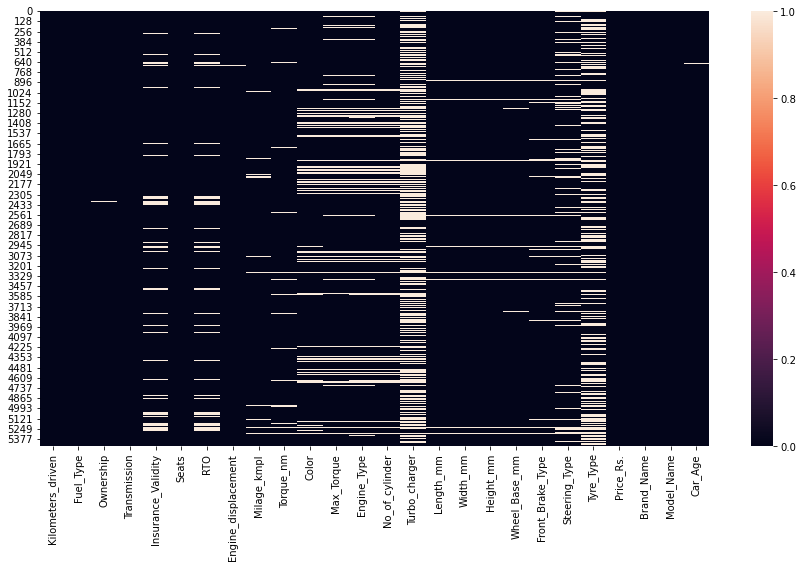

In [55]:
plt.figure(figsize=(15,8))
sns.heatmap(data.isnull())
plt.show()

In [56]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Kilometers_driven,5460.0,58740.171612,7.035661e+04,380.00,30888.00,52945.0,77884.75,4399000.0
Seats,5465.0,5.248856,7.302243e-01,2.00,5.00,5.0,5.00,10.0
Engine_displacement,5449.0,1493.357497,5.147386e+02,0.00,1197.00,1373.0,1591.00,5461.0
Milage_kmpl,5287.0,19.049264,4.045332e+00,7.81,16.55,18.8,21.40,110.0
Torque_nm,5275.0,186.733894,1.191062e+02,5.00,110.00,145.0,248.00,740.0
No_of_cylinder,4840.0,3.853512,5.687204e-01,2.00,4.00,4.0,4.00,10.0
Length_mm,5379.0,4157.448410,4.187529e+02,4.00,3840.00,3995.0,4453.00,5453.0
Width_mm,5378.0,1738.553737,1.370438e+02,1410.00,1680.00,1734.0,1800.00,2226.0
Height_mm,5377.0,1578.919100,1.238628e+02,1165.00,1493.00,1530.0,1645.00,3165.0
Wheel_Base_mm,5354.0,2434.293239,5.540493e+02,110.00,2425.00,2520.0,2650.00,3365.0


In [57]:
data.describe(include=object).T

,count,unique,top,freq
Fuel_Type,5466,5,Petrol,3122
Ownership,5452,5,First Owner,4143
Transmission,5466,2,Manual,3936
Insurance_Validity,4964,4,Comprehensive,2055
RTO,4967,410,GJ01,375
Color,4833,320,White,1398
Max_Torque,4762,480,200Nm@1750rpm,242
Engine_Type,4714,373,In-Line Engine,392
Turbo_charger,2645,3,No,1690
Front_Brake_Type,5330,11,Disc,2905


#### Observation

1. Null value is present.
2. Seems outliers are present as there is a difference between 75% and max of some features.
3. Minimum Engine_displacement is 0. Seems it is a error,
4. Minimum Length_mm is 4 where maximim 5453.
5. Minimum Car_age is 0 where maximum is 20 years.
6. Maximum Color of car is White.
7. In maximum cases Max_Torque of car is 200Nm@1750rpm.
8. In maximum cases Engine_Type is In-Line Engine

### Null value imputation:

1. All of the Categorical variable can be imputate with mode.
2. All of the Numerical value can be imputate with Mean and Median. We can decide imputation method based on boxplot & Distplot.

#### Categorical variable:

In [58]:
data['Ownership'].fillna(data['Ownership'].mode()[0],inplace = True)
data['Insurance_Validity'].fillna(data['Insurance_Validity'].mode()[0],inplace = True)
data['RTO'].fillna(data['RTO'].mode()[0],inplace = True)
data['Color'].fillna(data['Color'].mode()[0],inplace = True)
data['Max_Torque'].fillna(data['Max_Torque'].mode()[0],inplace = True)
data['Engine_Type'].fillna(data['Engine_Type'].mode()[0],inplace = True)
data['Turbo_charger'].fillna(data['Turbo_charger'].mode()[0],inplace = True)
data['Front_Brake_Type'].fillna(data['Front_Brake_Type'].mode()[0],inplace = True)
data['Steering_Type'].fillna(data['Steering_Type'].mode()[0],inplace = True)
data['Tyre_Type'].fillna(data['Tyre_Type'].mode()[0],inplace = True)

#### Numerical variables:

*Kilometers_driven*

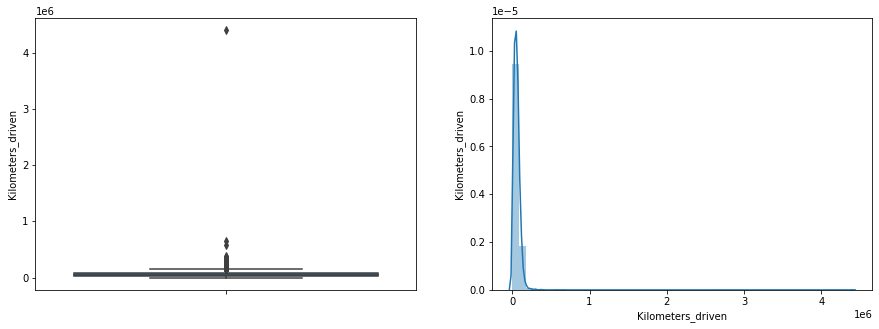

In [59]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y = 'Kilometers_driven', data= data,ax=ax[0])
plt.ylabel('Kilometers_driven')
sns.distplot(data['Kilometers_driven'] ,ax=ax[1])
plt.xlabel('Kilometers_driven')
plt.show()

In [60]:
print("Mean of Kilometers_driven:",data['Kilometers_driven'].mean())
print("Median of Kilometers_driven:",data['Kilometers_driven'].median())

Mean of Kilometers_driven: 58740.17161172161
Median of Kilometers_driven: 52945.0



Outliers are present in the Kilometers_driven dataset. Let's impute the missing value with median of this column. Kilometers_driven is right skewed in nature. 

In [61]:
data['Kilometers_driven'].fillna(data['Kilometers_driven'].median(), inplace =True)

 *Seats*

In [62]:
data['Seats'].value_counts()

5.0     4672
7.0      582
4.0       66
6.0       64
8.0       64
2.0        9
9.0        7
10.0       1
Name: Seats, dtype: int64


Though Seats is a numarical data but it has some discrete value counts. So impute this with mode and treat it as a categorical datatype.

In [63]:
data['Seats'].fillna(data['Seats'].mode()[0],inplace = True)
data['Seats'] = data['Seats'].astype(str)

**Engine_displacement:**

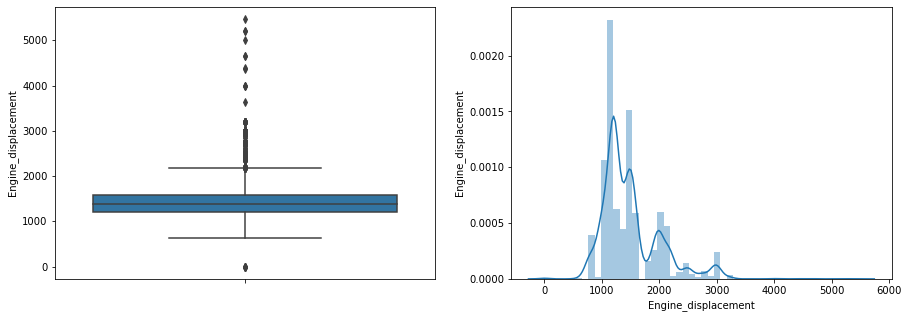

In [64]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y = 'Engine_displacement', data= data,ax=ax[0])
plt.ylabel('Engine_displacement')
sns.distplot(data['Engine_displacement'] ,ax=ax[1])
plt.xlabel('Engine_displacement')
plt.show()

In [65]:
print("Mean of Engine_displacement:",data['Engine_displacement'].mean())
print("Median of Engine_displacement:",data['Engine_displacement'].median())

Mean of Engine_displacement: 1493.3574967884015
Median of Engine_displacement: 1373.0


#### Observations:

Outliers are present in the Engine_displacement dataset. Let's impute the missing value with median of this column. Engine_displacement is right skewed in nature. 

In [66]:
data['Engine_displacement'].fillna(data['Engine_displacement'].median(), inplace =True)

**Milage_kmpl:**

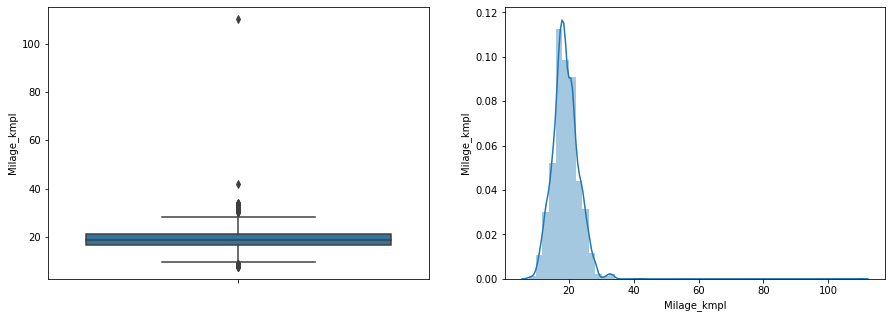

In [67]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y = 'Milage_kmpl', data= data,ax=ax[0])
plt.ylabel('Milage_kmpl')
sns.distplot(data['Milage_kmpl'] ,ax=ax[1])
plt.xlabel('Milage_kmpl')
plt.show()

In [68]:
print("Mean of Milage_kmpl:",data['Milage_kmpl'].mean())
print("Median of Milage_kmpl:",data['Milage_kmpl'].median())

Mean of Milage_kmpl: 19.049264233024346
Median of Milage_kmpl: 18.8


#### Observations:

Outliers are present in the Milage_kmpl dataset. Let's impute the missing value with median of this column. Milage_kmpl is right skewed in nature. 

In [69]:
data['Milage_kmpl'].fillna(data['Milage_kmpl'].median(), inplace =True)

**Torque_nm:**

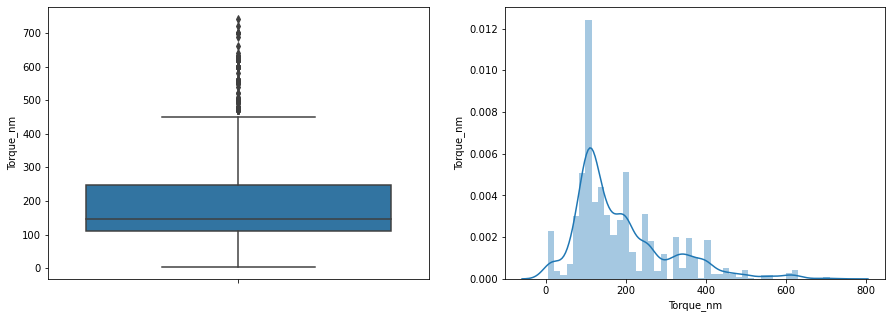

In [70]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y = 'Torque_nm', data= data,ax=ax[0])
plt.ylabel('Torque_nm')
sns.distplot(data['Torque_nm'] ,ax=ax[1])
plt.xlabel('Torque_nm')
plt.show()

In [71]:
print("Mean of Torque_nm:",data['Torque_nm'].mean())
print("Median of Torque_nm:",data['Torque_nm'].median())

Mean of Torque_nm: 186.73389383886234
Median of Torque_nm: 145.0


#### Observations:

Outliers are present in the Torque_nm dataset. Let's impute the missing value with median of this column. Torque_nm is right skewed in nature. 

In [72]:
data['Torque_nm'].fillna(data['Torque_nm'].median(), inplace =True)

**No_of_cylinder:**

In [73]:
data['No_of_cylinder'].value_counts()

4.0     3734
3.0      970
6.0       99
5.0       14
8.0        9
2.0        7
7.0        5
10.0       2
Name: No_of_cylinder, dtype: int64

#### Observations:

Though No_of_cylinder is a numarical data but it has some discrete value counts. So impute this with mode and treat it as a categorical datatype.

In [74]:
data['No_of_cylinder'].fillna(data['No_of_cylinder'].mode()[0],inplace = True)
data['No_of_cylinder'] = data['No_of_cylinder'].astype(str)

**Length_mm:**

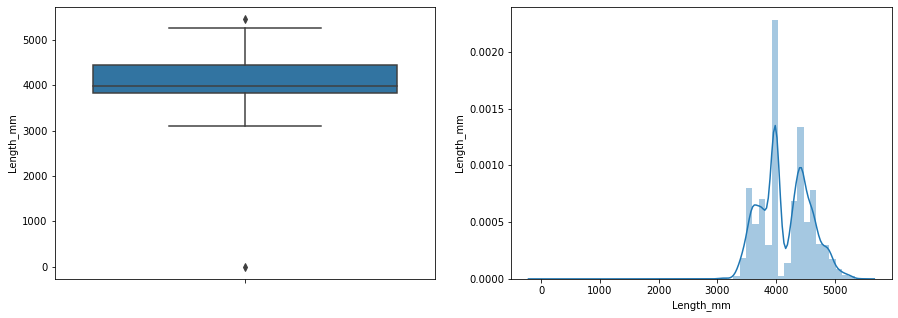

In [75]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y = 'Length_mm', data= data,ax=ax[0])
plt.ylabel('Length_mm')
sns.distplot(data['Length_mm'] ,ax=ax[1])
plt.xlabel('Length_mm')
plt.show()

In [76]:
print("Mean of Length_mm:",data['Length_mm'].mean())
print("Median of Length_mm:",data['Length_mm'].median())

Mean of Length_mm: 4157.44841048522
Median of Length_mm: 3995.0


#### Observations:

Outliers are present in the Length_mm dataset. Let's impute the missing value with median of this column. Length_mm is left skewed in nature. 

In [77]:
data['Length_mm'].fillna(data['Length_mm'].median(), inplace =True)

**Width_mm:**

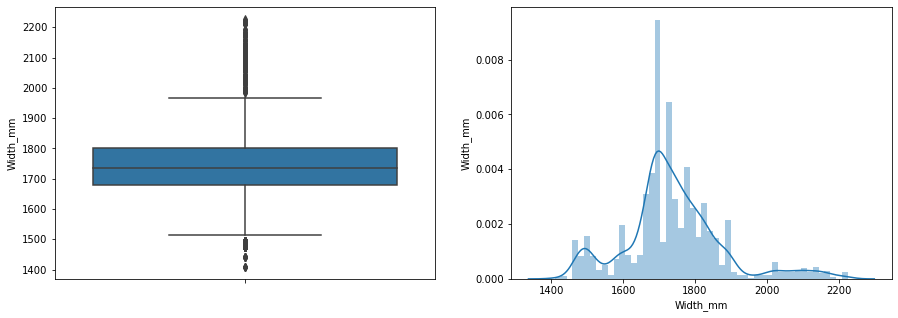

In [78]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y = 'Width_mm', data= data,ax=ax[0])
plt.ylabel('Width_mm')
sns.distplot(data['Width_mm'] ,ax=ax[1])
plt.xlabel('Width_mm')
plt.show()

In [79]:
print("Mean of Width_mm:",data['Width_mm'].mean())
print("Median of Width_mm:",data['Width_mm'].median())

Mean of Width_mm: 1738.5537374488658
Median of Width_mm: 1734.0


#### Observations:

Imputate Width_mm with mean as almost no outliers present.

In [80]:
data['Width_mm'].fillna(data['Width_mm'].mean(), inplace =True)

**Height_mm**

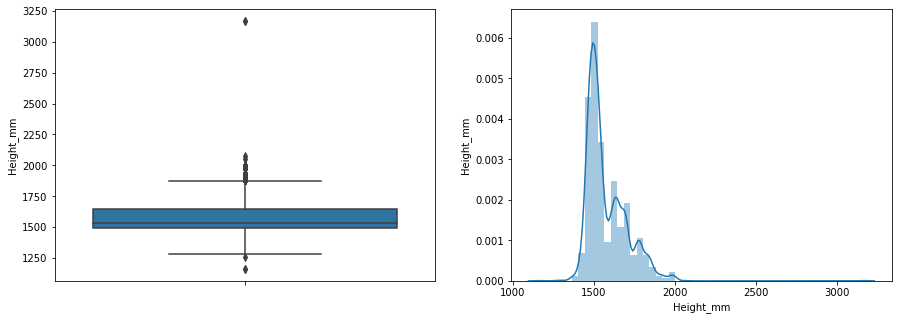

In [81]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y = 'Height_mm', data= data,ax=ax[0])
plt.ylabel('Height_mm')
sns.distplot(data['Height_mm'] ,ax=ax[1])
plt.xlabel('Height_mm')
plt.show()

In [82]:
print("Mean of Height_mm:",data['Height_mm'].mean())
print("Median of Height_mm:",data['Height_mm'].median())

Mean of Height_mm: 1578.919099869816
Median of Height_mm: 1530.0


#### Observations:

Outliers are present in the Height_mm dataset. Let's impute the missing value with median of this column. Height_mm is right skewed in nature. 

In [83]:
data['Height_mm'].fillna(data['Height_mm'].median(), inplace =True)

**Wheel_Base_mm:**

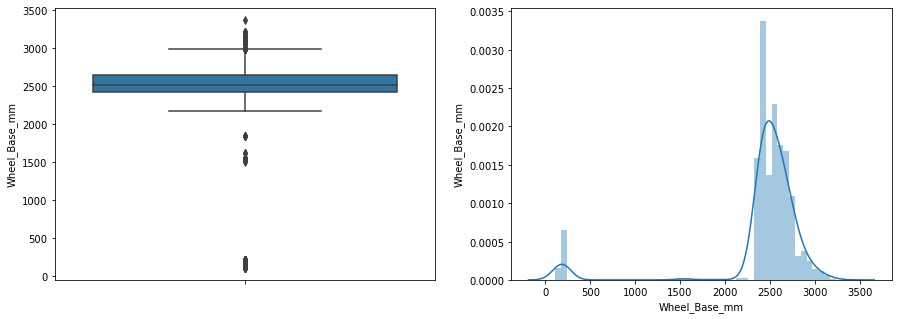

In [84]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y = 'Wheel_Base_mm', data= data,ax=ax[0])
plt.ylabel('Wheel_Base_mm')
sns.distplot(data['Wheel_Base_mm'] ,ax=ax[1])
plt.xlabel('Wheel_Base_mm')
plt.show()

In [85]:
print("Mean of Wheel_Base_mm:",data['Wheel_Base_mm'].mean())
print("Median of Wheel_Base_mm:",data['Wheel_Base_mm'].median())

Mean of Wheel_Base_mm: 2434.2932387000374
Median of Wheel_Base_mm: 2520.0


#### Observations:

Outliers are present in the Wheel_Base_mm dataset. Let's impute the missing value with median of this column. Wheel_Base_mm is left skewed in nature. 

In [86]:
data['Wheel_Base_mm'].fillna(data['Wheel_Base_mm'].median(), inplace =True)

**Car_Age:**

In [87]:
data['Car_Age'].value_counts()

5.0     667
4.0     557
6.0     535
7.0     516
3.0     487
8.0     463
1.0     366
9.0     357
2.0     354
10.0    304
11.0    248
12.0    184
13.0    128
14.0    100
0.0      98
15.0     40
16.0     22
18.0     14
17.0     13
19.0      4
20.0      1
Name: Car_Age, dtype: int64

#### Observations:

Though Car_Age is a numarical data but it has some discrete value counts. So impute this with median.

In [88]:
data['Car_Age'].fillna(data['Car_Age'].median(),inplace = True)

### Check Null value after imputation

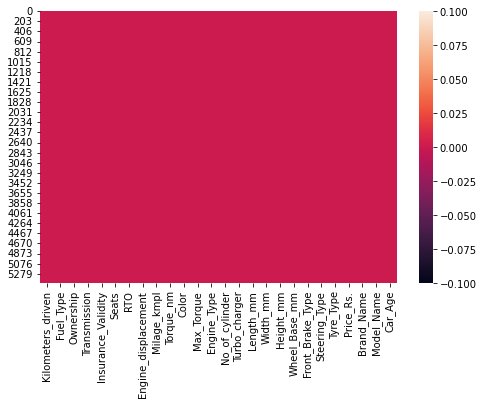

In [89]:
plt.figure(figsize=(8,5))
sns.heatmap(data.isnull())
plt.show()

### Datatypes after converting into appropriate datatypes:


In [90]:
data.columns.to_series().groupby(data.dtypes).groups

{float64: ['Kilometers_driven', 'Engine_displacement', 'Milage_kmpl', 'Torque_nm', 'Length_mm', 'Width_mm', 'Height_mm', 'Wheel_Base_mm', 'Price_Rs.', 'Car_Age'], object: ['Fuel_Type', 'Ownership', 'Transmission', 'Insurance_Validity', 'Seats', 'RTO', 'Color', 'Max_Torque', 'Engine_Type', 'No_of_cylinder', 'Turbo_charger', 'Front_Brake_Type', 'Steering_Type', 'Tyre_Type', 'Brand_Name', 'Model_Name']}

In [91]:
Num= ['Kilometers_driven', 'Engine_displacement', 'Milage_kmpl', 'Torque_nm', 'Length_mm',
      'Width_mm', 'Height_mm', 'Wheel_Base_mm', 'Price_Rs.', 'Car_Age']

Cat= ['Fuel_Type', 'Ownership', 'Transmission', 'Insurance_Validity', 'Seats', 'RTO', 
      'Color', 'Max_Torque', 'Engine_Type', 'No_of_cylinder', 'Turbo_charger', 'Front_Brake_Type', 
      'Steering_Type', 'Tyre_Type', 'Brand_Name', 'Model_Name']

### EDA:

###Exploration of categorical features:
#### 1. Fuel_Type 

In [92]:
data['Fuel_Type'].value_counts()

Petrol      3122
Diesel      2184
CNG          125
LPG           22
Electric      13
Name: Fuel_Type, dtype: int64

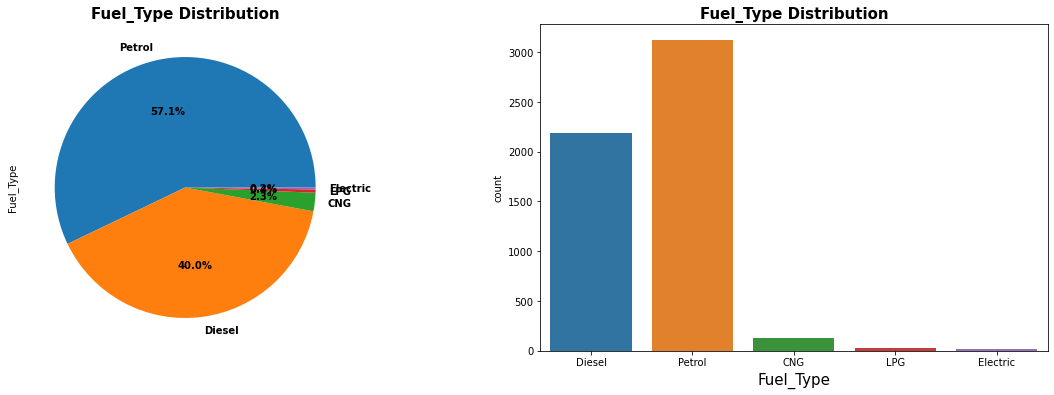

In [93]:
f,ax=plt.subplots(1,2,figsize=(20,6))

data['Fuel_Type'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('Fuel_Type Distribution', fontsize=15,fontweight ='bold')
sns.countplot('Fuel_Type',data=data ,ax=ax[1])
ax[1].set_title('Fuel_Type Distribution',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('Fuel_Type',fontsize=15)
plt.show()

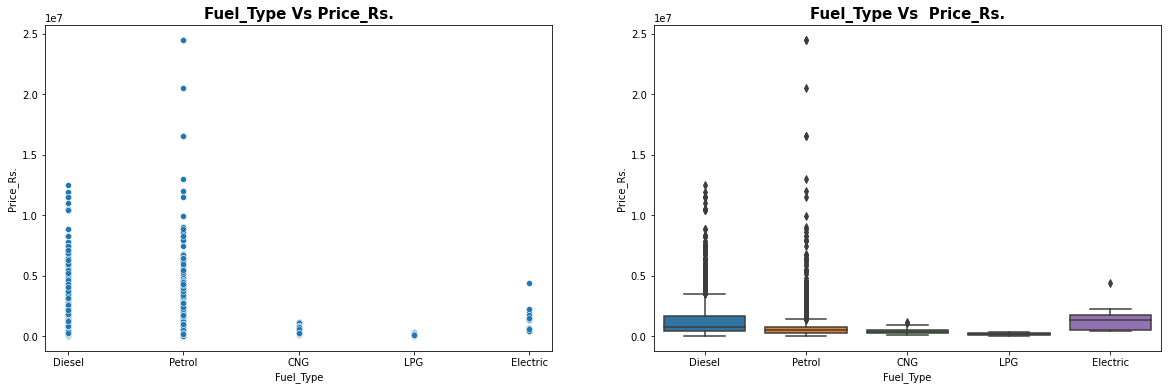

In [94]:
f,ax=plt.subplots(1,2,figsize=(20,6))

sns.scatterplot(x=data['Fuel_Type'], y=data['Price_Rs.'], ax=ax[0])
ax[0].set_title('Fuel_Type Vs Price_Rs.', fontsize=15,fontweight ='bold')

sns.boxplot(x=data['Fuel_Type'], y=data['Price_Rs.'],ax=ax[1])
ax[1].set_title('Fuel_Type Vs  Price_Rs.',fontsize=15,fontweight ='bold')
plt.show()

#### Observations:

1. Maximum Fuel type is Petrol which is 57 %.
2. Minimum Fuel type is Electric.
3. Maximum price is for Petrol and LPG car is the least price car.

#### 2. Ownership:

In [95]:
data['Ownership'].value_counts()

First Owner     4157
Second Owner    1055
Third Owner      185
Fourth Owner      58
Fifth Owner       11
Name: Ownership, dtype: int64

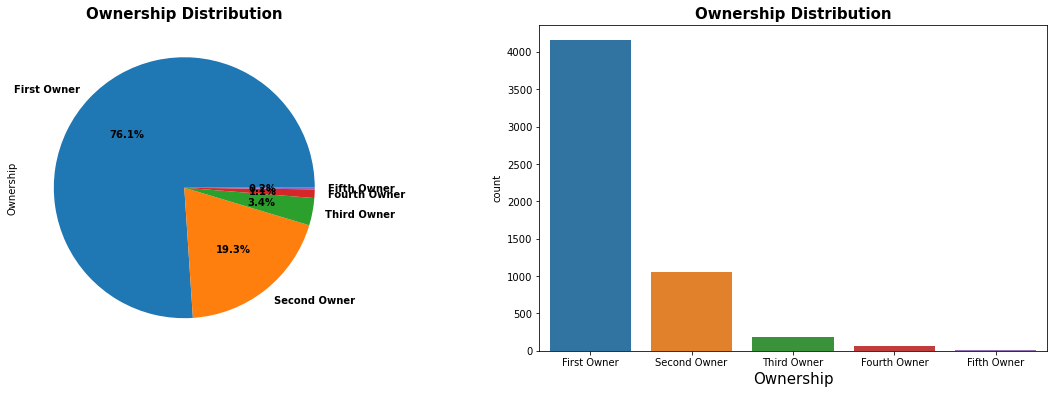

In [96]:
f,ax=plt.subplots(1,2,figsize=(20,6))

data['Ownership'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('Ownership Distribution', fontsize=15,fontweight ='bold')
sns.countplot('Ownership',data=data ,ax=ax[1])
ax[1].set_title('Ownership Distribution',fontsize=15,fontweight ='bold')
ax[1].set_xlabel('Ownership',fontsize=15)
plt.show()

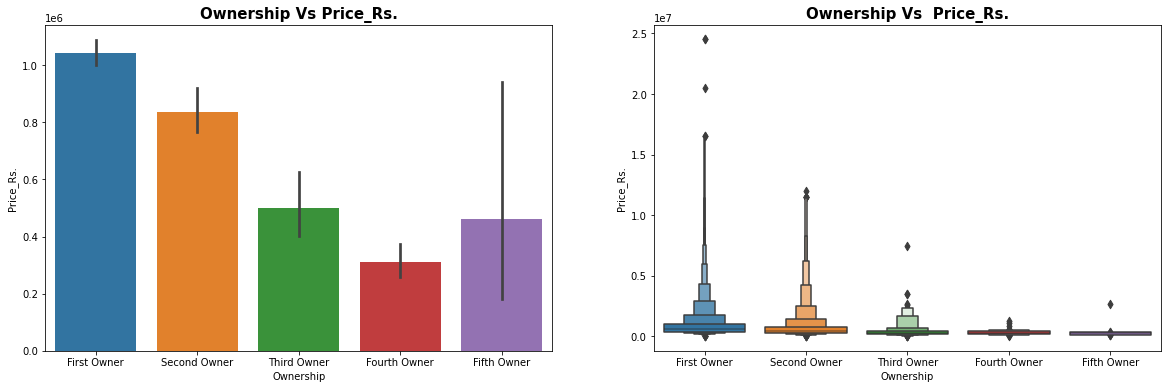

In [97]:
f,ax=plt.subplots(1,2,figsize=(20,6))

sns.barplot(x=data['Ownership'], y=data['Price_Rs.'], ax=ax[0])
ax[0].set_title('Ownership Vs Price_Rs.', fontsize=15,fontweight ='bold')

sns.boxenplot(x=data['Ownership'], y=data['Price_Rs.'],ax=ax[1])
ax[1].set_title('Ownership Vs  Price_Rs.',fontsize=15,fontweight ='bold')
plt.show()

#### Observations:

1. Maximum ownership is First owner around 76%.
2. Minimum is fifth owner.
3. Car from first owner is high price.

#### 3.Transmission:

In [98]:
data['Transmission'].value_counts()

Manual       3936
Automatic    1530
Name: Transmission, dtype: int64

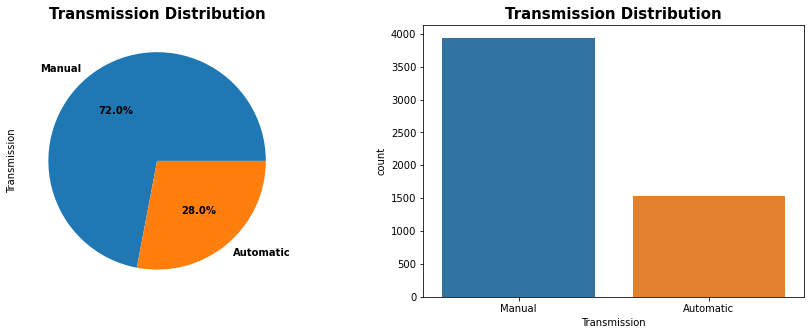

In [99]:
f,ax=plt.subplots(1,2,figsize=(15,5))

data['Transmission'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('Transmission Distribution', fontsize=15,fontweight ='bold')
sns.countplot('Transmission',data=data ,ax=ax[1])
ax[1].set_title('Transmission Distribution',fontsize=15,fontweight ='bold')
plt.show()

Text(0, 0.5, 'Price_Rs.')

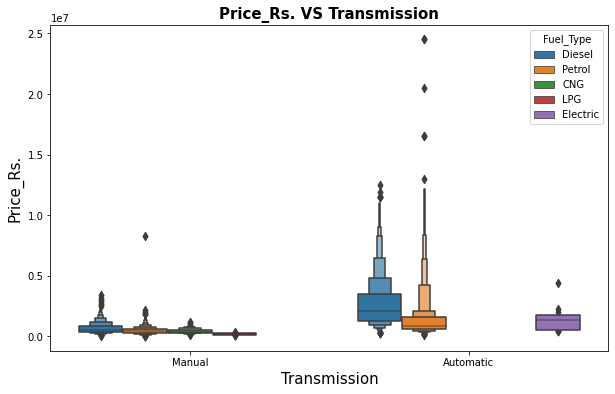

In [100]:
plt.figure(figsize =(10,6))
sns.boxenplot(y= data['Price_Rs.'],x=data['Transmission'], hue= data['Fuel_Type'])
plt.title("Price_Rs. VS Transmission",fontsize=15,fontweight ='bold')
plt.xlabel('Transmission',fontsize = 15)
plt.ylabel('Price_Rs.',fontsize = 15)

#### Observations:

1. There are two Transmission type, Manual and Automatic.
2. Maximim transmission is Manual.
3. The pricing is high if the Transmission is Automatic.

#### 4. Insurance_Validity:

In [101]:
data['Insurance_Validity'].value_counts()

Comprehensive            2557
Third Party insurance    2009
Not Available             652
Zero Dep                  248
Name: Insurance_Validity, dtype: int64

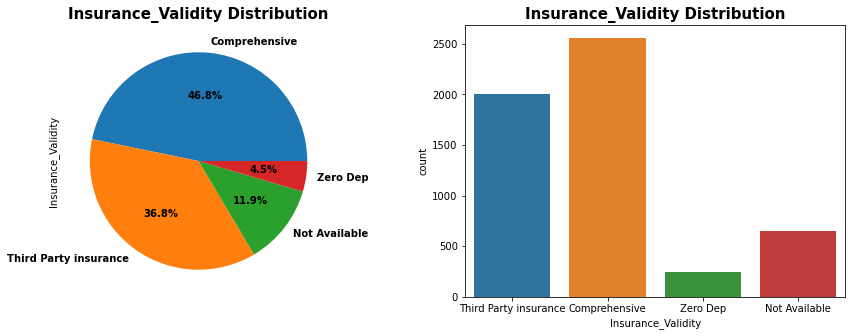

In [102]:
f,ax=plt.subplots(1,2,figsize=(15,5))

data['Insurance_Validity'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('Insurance_Validity Distribution', fontsize=15,fontweight ='bold')
sns.countplot('Insurance_Validity',data=data ,ax=ax[1])
ax[1].set_title('Insurance_Validity Distribution',fontsize=15,fontweight ='bold')
plt.show()

Text(0, 0.5, 'Price_Rs.')

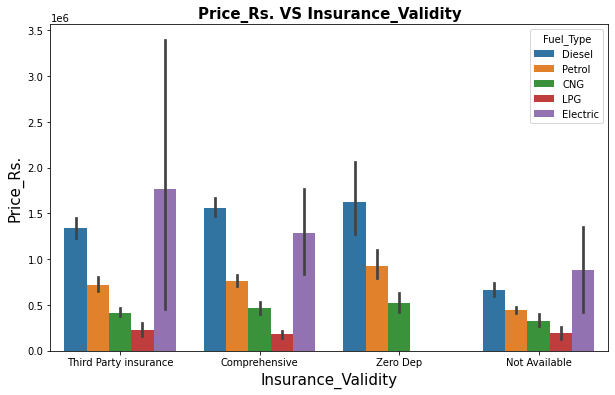

In [103]:
plt.figure(figsize =(10,6))
sns.barplot(y= data['Price_Rs.'],x=data['Insurance_Validity'], hue=data['Fuel_Type'] )
plt.title("Price_Rs. VS Insurance_Validity",fontsize=15,fontweight ='bold')
plt.xlabel('Insurance_Validity',fontsize = 15)
plt.ylabel('Price_Rs.',fontsize = 15)

#### Observations:

1. Maximim Insurance_Validity is Comprehensive which is 2055.
2. No such relationship between Insurance_Validity and corrosponding price.

#### 5. Seats:

In [104]:
data['Seats'].value_counts()

5.0     4673
7.0      582
4.0       66
6.0       64
8.0       64
2.0        9
9.0        7
10.0       1
Name: Seats, dtype: int64

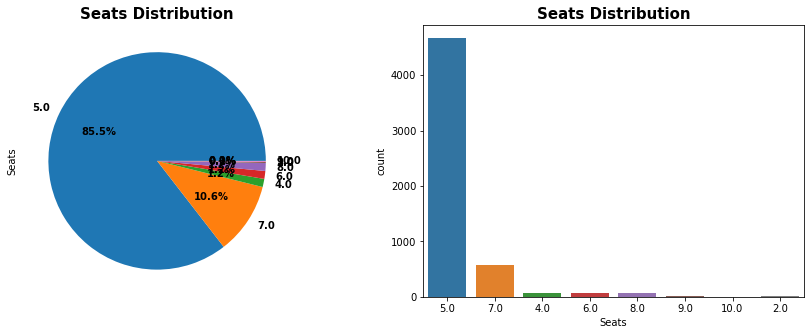

In [105]:
f,ax=plt.subplots(1,2,figsize=(15,5))

data['Seats'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('Seats Distribution', fontsize=15,fontweight ='bold')
sns.countplot('Seats',data=data ,ax=ax[1])
ax[1].set_title('Seats Distribution',fontsize=15,fontweight ='bold')
plt.show()

Text(0, 0.5, 'Price_Rs.')

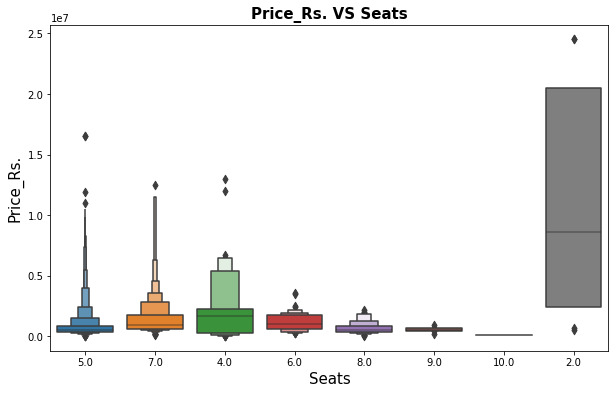

In [106]:
plt.figure(figsize =(10,6))
sns.boxenplot(y= data['Price_Rs.'],x=data['Seats'] )
plt.title("Price_Rs. VS Seats",fontsize=15,fontweight ='bold')
plt.xlabel('Seats',fontsize = 15)
plt.ylabel('Price_Rs.',fontsize = 15)

#### Observations:

1. Around 85% car is 5 seater.
2. Very few cars are 9 or 10 seater.
3. Among all 7 cars are 2 seater and they are very high in price.
4. Price is very less for 9 and 10 seated car

#### 6. No_of _cylinders:

In [107]:
data['No_of_cylinder'].value_counts()

4.0     4360
3.0      970
6.0       99
5.0       14
8.0        9
2.0        7
7.0        5
10.0       2
Name: No_of_cylinder, dtype: int64

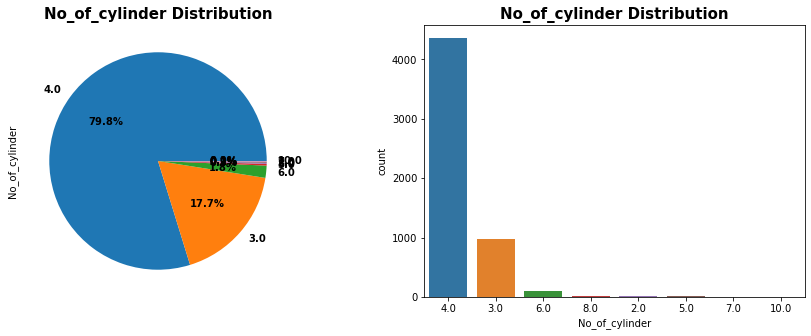

In [108]:
f,ax=plt.subplots(1,2,figsize=(15,5))

data['No_of_cylinder'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('No_of_cylinder Distribution', fontsize=15,fontweight ='bold')
sns.countplot('No_of_cylinder',data=data ,ax=ax[1])
ax[1].set_title('No_of_cylinder Distribution',fontsize=15,fontweight ='bold')
plt.show()

Text(0, 0.5, 'Price_Rs.')

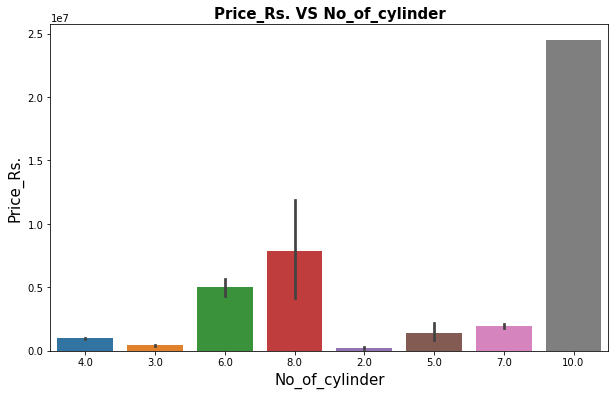

In [109]:
plt.figure(figsize =(10,6))
sns.barplot(y= data['Price_Rs.'],x=data['No_of_cylinder'] )
plt.title("Price_Rs. VS No_of_cylinder",fontsize=15,fontweight ='bold')
plt.xlabel('No_of_cylinder',fontsize = 15)
plt.ylabel('Price_Rs.',fontsize = 15)

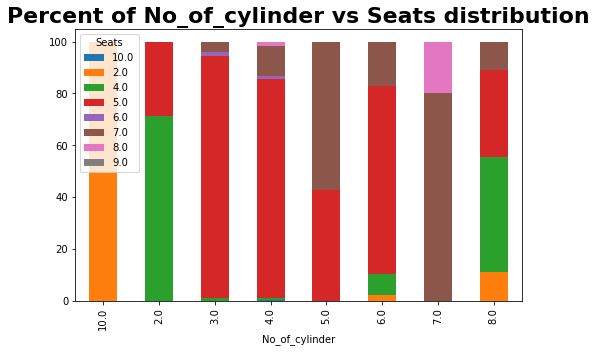

In [110]:
table= pd.crosstab(data['No_of_cylinder'], data['Seats'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True, figsize=(8,5))
plt.title('Percent of No_of_cylinder vs Seats distribution', fontsize=22, fontweight='bold')
plt.show()

#### Observations:

1. No of cylinder of maximum car is 4 followed by 3,
2. Car price is high for 8 and 10 cylinder.

#### 7. Turbo_charger:

In [111]:
data['Turbo_charger'].value_counts()

No      4511
Yes      953
Twin       2
Name: Turbo_charger, dtype: int64

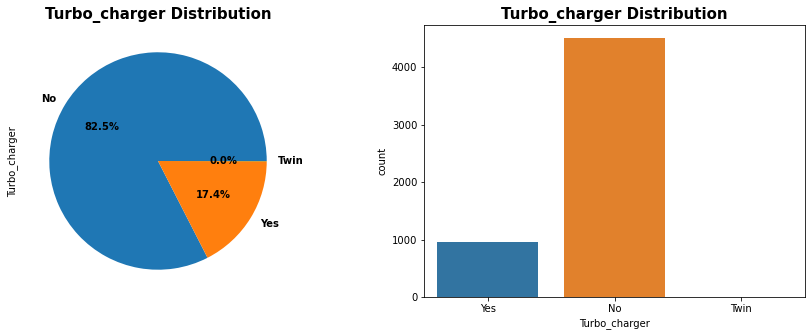

In [112]:
f,ax=plt.subplots(1,2,figsize=(15,5))

data['Turbo_charger'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('Turbo_charger Distribution', fontsize=15,fontweight ='bold')
sns.countplot('Turbo_charger',data=data ,ax=ax[1])
ax[1].set_title('Turbo_charger Distribution',fontsize=15,fontweight ='bold')
plt.show()

Text(0, 0.5, 'Price_Rs.')

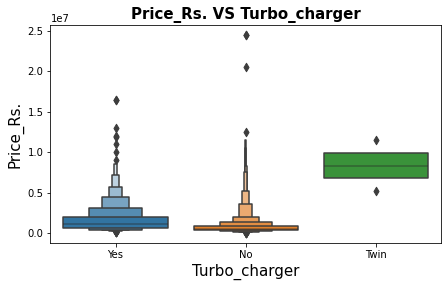

In [113]:
plt.figure(figsize =(7,4))
sns.boxenplot(y= data['Price_Rs.'],x=data['Turbo_charger'] )
plt.title("Price_Rs. VS Turbo_charger",fontsize=15,fontweight ='bold')
plt.xlabel('Turbo_charger',fontsize = 15)
plt.ylabel('Price_Rs.',fontsize = 15)

#### Observations:

1. Maximim Turbo_charger type is No.
2. Only 2 are Twin type and their price is high.

#### 8. Front_Brake_Type:

In [114]:
data['Front_Brake_Type'].value_counts()

Disc                                          3041
Ventilated Disc                               1715
Drum                                           554
Solid Disc                                      93
Disc & Caliper Type                             50
Multilateral Disc                                6
Electric Parking Brake                           2
Six Piston Claipers                              2
Dual Circuit with ABS, ABS with BAS              1
Vacuum assisted hydraulic dual circuit w         1
Single Piston Sliding Caliper, Vented Disc       1
Name: Front_Brake_Type, dtype: int64

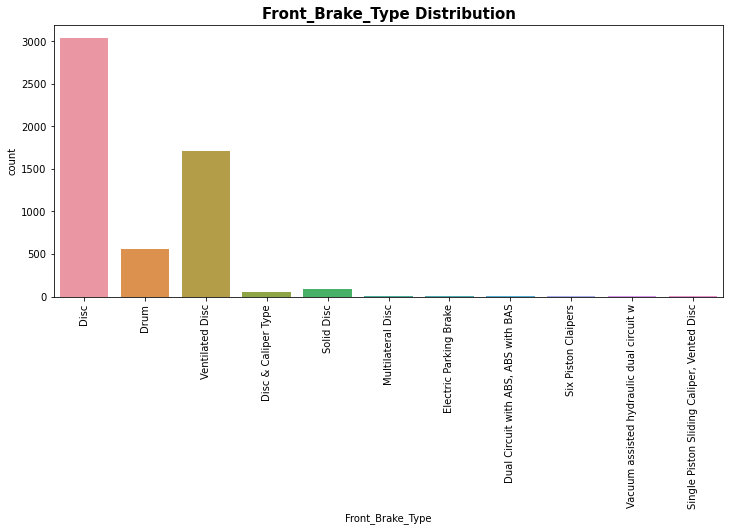

In [115]:
plt.figure(figsize=(12,5))
sns.countplot('Front_Brake_Type',data=data)
plt.title('Front_Brake_Type Distribution',fontsize=15,fontweight ='bold')
plt.xticks(rotation =90)
plt.show()

Text(0, 0.5, 'Price_Rs.')

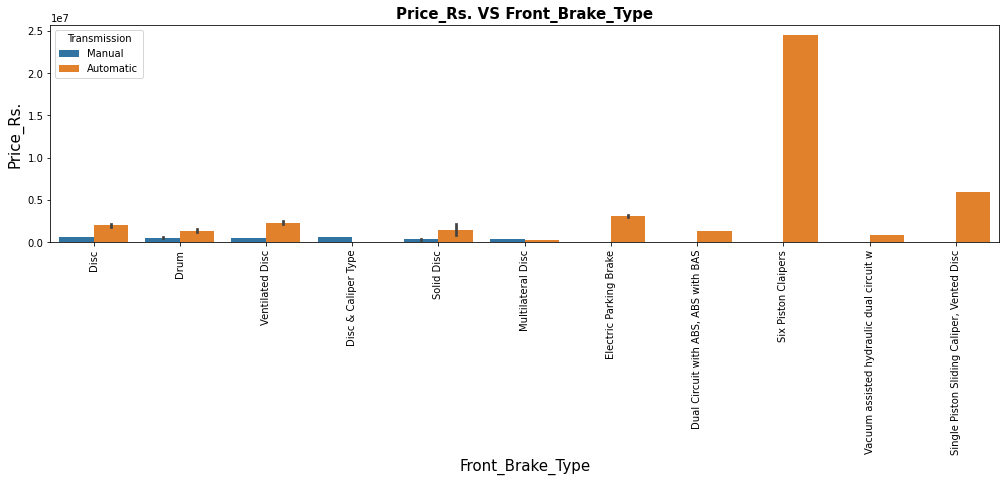

In [116]:
plt.figure(figsize =(17,4))
sns.barplot(y= data['Price_Rs.'],x=data['Front_Brake_Type'], hue=data['Transmission'] )
plt.title("Price_Rs. VS Front_Brake_Type",fontsize=15,fontweight ='bold')
plt.xlabel('Front_Brake_Type',fontsize = 15)
plt.xticks(rotation=90)
plt.ylabel('Price_Rs.',fontsize = 15)

#### Observations:

1. Maximum Front_Brake_Type is Disc and Ventilated Disc.
2. Minimum type is Dual Circuit with ABS, ABS with BAS, Vacuum assisted hydraulic dual circuit w, Single Piston Sliding Caliper, Vented Disc.
3. The car price is high if Front_Brake_Type is Six piston claipers.

#### 9. Steering_Type

In [117]:
data['Steering_Type'].value_counts()

Power        5076
Electric      331
Manual         56
Hydraulic       3
Name: Steering_Type, dtype: int64

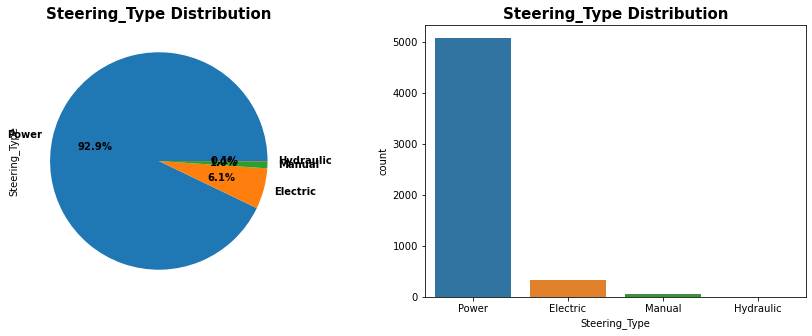

In [118]:
f,ax=plt.subplots(1,2,figsize=(15,5))

data['Steering_Type'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('Steering_Type Distribution', fontsize=15,fontweight ='bold')
sns.countplot('Steering_Type',data=data ,ax=ax[1])
ax[1].set_title('Steering_Type Distribution',fontsize=15,fontweight ='bold')
plt.show()

Text(0, 0.5, 'Price_Rs.')

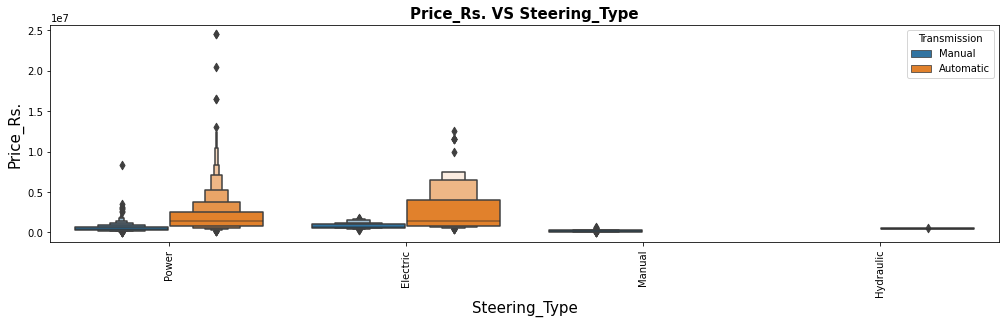

In [119]:
plt.figure(figsize =(17,4))
sns.boxenplot(y= data['Price_Rs.'],x=data['Steering_Type'], hue=data['Transmission'] )
plt.title("Price_Rs. VS Steering_Type",fontsize=15,fontweight ='bold')
plt.xlabel('Steering_Type',fontsize = 15)
plt.xticks(rotation=90)
plt.ylabel('Price_Rs.',fontsize = 15)

#### Observations:

1. Maximum car are Power Steering_Type and it's price is also high compare to other steering types.
2. Hydraulic Steering_Type is most rare.
3. The car price is low if the Steering_Type is Hydraulic or Manual.

#### 10. Tyre_Type:

In [120]:
data['Tyre_Type'].value_counts()

Tubeless_Radial      4497
Tubeless              888
Radial                 44
Run_Flat               24
Tubeless_ Runflat      13
Name: Tyre_Type, dtype: int64

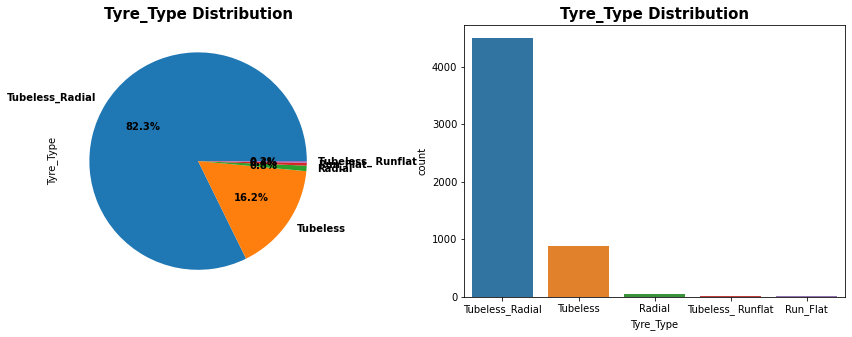

In [121]:
f,ax=plt.subplots(1,2,figsize=(15,5))

data['Tyre_Type'].value_counts().plot.pie(autopct='%3.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0])
ax[0].set_title('Tyre_Type Distribution', fontsize=15,fontweight ='bold')
sns.countplot('Tyre_Type',data=data ,ax=ax[1])
ax[1].set_title('Tyre_Type Distribution',fontsize=15,fontweight ='bold')
plt.show()

Text(0, 0.5, 'Price_Rs.')

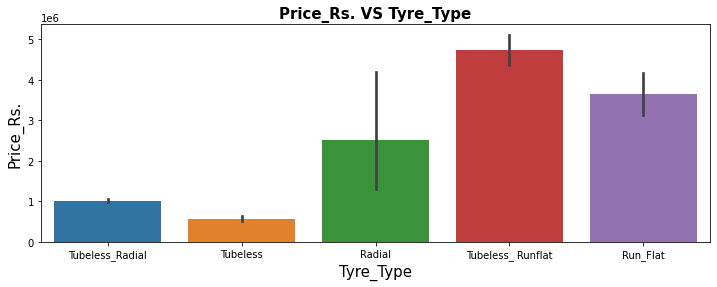

In [122]:
plt.figure(figsize =(12,4))
sns.barplot(y= data['Price_Rs.'],x=data['Tyre_Type'] )
plt.title("Price_Rs. VS Tyre_Type",fontsize=15,fontweight ='bold')
plt.xlabel('Tyre_Type',fontsize = 15)
plt.ylabel('Price_Rs.',fontsize = 15)

#### Observations: 

1. Maximum tyre is Tubeless_Radial and it's price is low.
2. Tubeless_ Runflat is the most rare type and it is the cosier tyre compare to other types.

### Exploration of Numarical features:

#### 11. Car_Age

In [123]:
data['Car_Age'].value_counts()

5.0     667
4.0     557
6.0     543
7.0     516
3.0     487
8.0     463
1.0     366
9.0     357
2.0     354
10.0    304
11.0    248
12.0    184
13.0    128
14.0    100
0.0      98
15.0     40
16.0     22
18.0     14
17.0     13
19.0      4
20.0      1
Name: Car_Age, dtype: int64

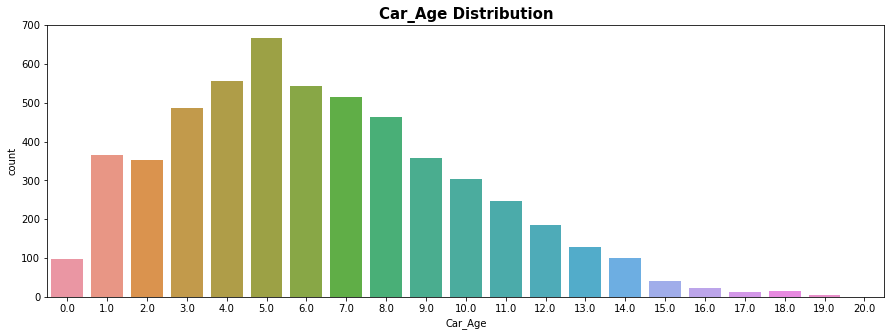

In [124]:
plt.figure(figsize=(15,5))
sns.countplot('Car_Age',data=data)
plt.title('Car_Age Distribution',fontsize=15,fontweight ='bold')
plt.show()

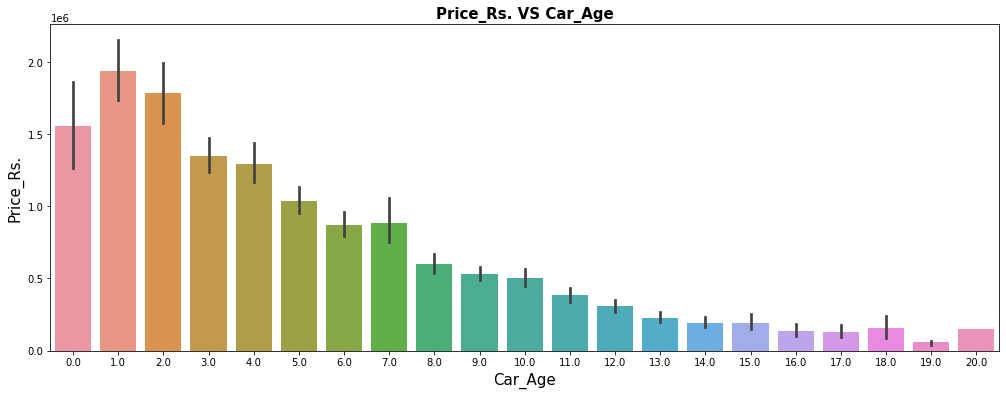

In [125]:
plt.figure(figsize =(17,6))
sns.barplot(y= data['Price_Rs.'],x=data['Car_Age'] )
plt.title("Price_Rs. VS Car_Age",fontsize=15,fontweight ='bold')
plt.xlabel('Car_Age',fontsize = 15)
plt.ylabel('Price_Rs.',fontsize = 15)
plt.show()

#### Observations:

1. For maximum case, car age is 5 followed by 4.
2. Car price is high for 1 and 2 year old car.
3. The car price is very low if the age of the car is above 12 years.

#### 12. Milage_kmpl:

Text(0, 0.5, 'Price_Rs.')

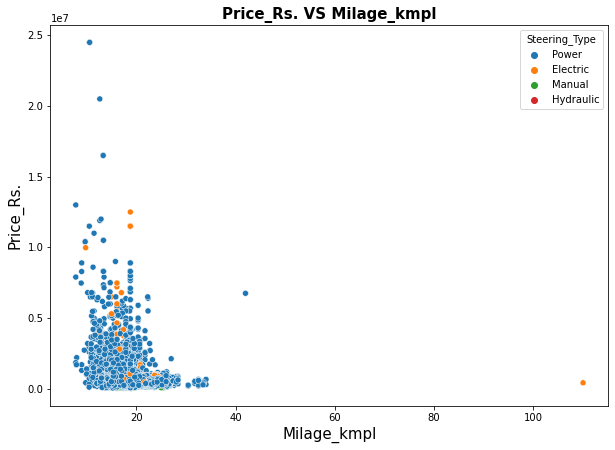

In [126]:
plt.figure(figsize =(10,7))
sns.scatterplot(y= data['Price_Rs.'],x=data['Milage_kmpl'], hue= data['Steering_Type'] )
plt.title("Price_Rs. VS Milage_kmpl",fontsize=15,fontweight ='bold')
plt.xlabel('Milage_kmpl',fontsize = 15)
plt.ylabel('Price_Rs.',fontsize = 15)

#### Observations:

1. Maximum milage is around 20 (range is 10 to 30)

#### 13. Torque_nm

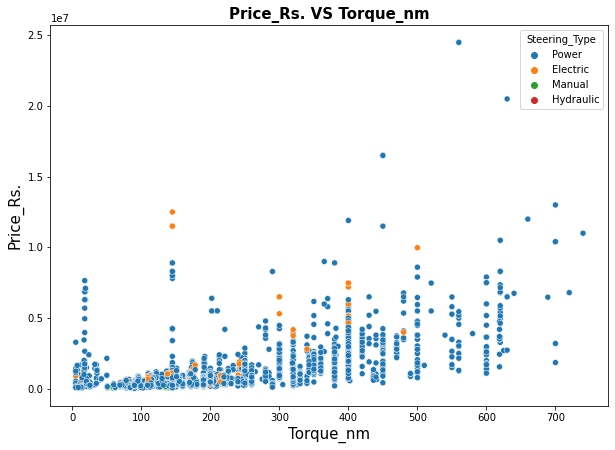

In [127]:
plt.figure(figsize =(10,7))
sns.scatterplot(y= data['Price_Rs.'],x=data['Torque_nm'], hue= data['Steering_Type'] )
plt.title("Price_Rs. VS Torque_nm",fontsize=15,fontweight ='bold')
plt.xlabel('Torque_nm',fontsize = 15)
plt.ylabel('Price_Rs.',fontsize = 15)
plt.show()

#### Observations:

1. Most of the cases the price is high if the torque is high value.

#### 14. Length_mm:

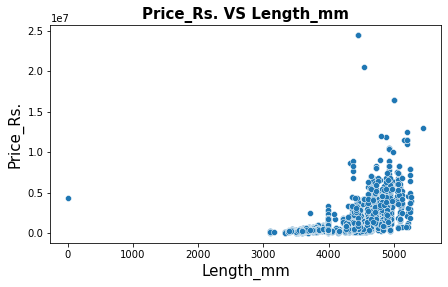

In [128]:
plt.figure(figsize =(7,4))
sns.scatterplot(y= data['Price_Rs.'],x=data['Length_mm'] )
plt.title("Price_Rs. VS Length_mm",fontsize=15,fontweight ='bold')
plt.xlabel('Length_mm',fontsize = 15)
plt.ylabel('Price_Rs.',fontsize = 15)
plt.show()

## Feature Engineering

### 1. Encoding Categorical Data:


In [129]:
data1= data.copy()

In [131]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Cat:
    data[i] = le.fit_transform(data[i])
data.head()

,Kilometers_driven,Fuel_Type,Ownership,Transmission,Insurance_Validity,Seats,RTO,Engine_displacement,Milage_kmpl,Torque_nm,Color,Max_Torque,Engine_Type,No_of_cylinder,Turbo_charger,Length_mm,Width_mm,Height_mm,Wheel_Base_mm,Front_Brake_Type,Steering_Type,Tyre_Type,Price_Rs.,Brand_Name,Model_Name,Car_Age
0,86226.0,1,1,1,2,3,57,1956.0,17.10,350.0,89,315,79,3,2,4395.0,1818.0,1640.0,2636.0,0,3,4,1003000.0,80,351,5.0
1,13248.0,4,1,0,2,3,57,1330.0,16.42,254.0,183,247,36,3,2,4360.0,1822.0,1695.0,205.0,2,3,4,1283000.0,160,1159,1.0
2,60343.0,4,1,0,2,3,57,2494.0,12.98,233.0,117,206,104,3,0,4850.0,1825.0,1480.0,2775.0,10,3,4,1640000.0,52,1656,6.0
3,90281.0,1,1,1,2,5,57,2179.0,15.10,330.0,305,301,366,3,2,4585.0,1890.0,1785.0,2700.0,1,3,4,780000.0,54,1438,7.0
4,39821.0,4,1,0,2,3,57,1199.0,17.10,110.0,107,24,20,3,0,3989.0,1694.0,1544.0,2530.0,2,3,4,605000.0,209,70,6.0


In [132]:
data.shape

(5466, 26)

#### Observations:

No categorical data is present.



### 2. Correlation:

In [142]:
data.corr()

,Kilometers_driven,Fuel_Type,Ownership,Transmission,Insurance_Validity,Seats,RTO,Engine_displacement,Milage_kmpl,Torque_nm,Color,Max_Torque,Engine_Type,No_of_cylinder,Turbo_charger,Length_mm,Width_mm,Height_mm,Wheel_Base_mm,Front_Brake_Type,Steering_Type,Tyre_Type,Price_Rs.,Brand_Name,Model_Name,Car_Age
Kilometers_driven,1.000000,-0.176665,0.125165,0.079231,-0.042343,0.079907,-0.065607,0.065738,-0.002992,0.046991,0.037772,0.019970,0.041584,0.026204,0.099486,0.032916,0.008148,0.040212,0.056204,0.068151,0.099328,0.015324,-0.093788,-0.009124,-0.002488,0.262824
Fuel_Type,-0.176665,1.000000,-0.070241,0.089065,0.065783,-0.309265,-0.016775,-0.444971,-0.138332,-0.547946,0.006725,-0.287762,0.013354,-0.208209,-0.414294,-0.377055,-0.397805,-0.343354,-0.141891,-0.094139,-0.112246,-0.047453,-0.204496,-0.013333,0.023261,0.002996
Ownership,0.125165,-0.070241,1.000000,0.038221,-0.079474,0.021992,-0.077217,0.054603,-0.046508,0.006327,0.018800,0.052048,0.012536,0.021438,0.032905,0.002365,-0.026176,-0.037715,0.068991,0.051765,0.084933,0.030087,-0.084513,0.021292,0.026280,0.354254
Transmission,0.079231,0.089065,0.038221,1.000000,0.073731,0.019722,0.017281,-0.433004,0.318461,-0.446323,0.065582,-0.179423,0.047148,-0.252441,-0.190047,-0.457545,-0.474731,-0.023810,-0.079454,0.008728,0.002651,-0.094361,-0.495167,-0.013545,0.018562,0.216786
Insurance_Validity,-0.042343,0.065783,-0.079474,0.073731,1.000000,-0.034675,0.128368,-0.077626,0.062396,-0.067256,-0.042143,-0.039210,-0.010052,-0.046446,-0.024828,-0.063352,-0.045934,-0.039697,-0.046739,-0.017384,-0.027429,-0.032827,-0.040044,0.006853,0.011322,-0.092416
Seats,0.079907,-0.309265,0.021992,0.019722,-0.034675,1.000000,0.009293,0.407961,-0.312880,0.266714,0.028024,0.096681,0.000914,0.096118,0.223909,0.321933,0.243477,0.634288,0.030209,0.026640,0.072580,0.091783,0.045774,-0.004249,0.007454,-0.021990
RTO,-0.065607,-0.016775,-0.077217,0.017281,0.128368,0.009293,1.000000,-0.006026,0.021861,0.016712,-0.077813,-0.018371,0.001000,-0.007495,0.010455,0.008663,0.039643,0.028866,-0.025289,-0.018103,-0.010039,-0.025873,0.035796,0.025450,-0.023529,-0.126571
Engine_displacement,0.065738,-0.444971,0.054603,-0.433004,-0.077626,0.407961,-0.006026,1.000000,-0.563514,0.767786,-0.045838,0.180764,0.033321,0.576993,0.399403,0.799275,0.726857,0.385478,0.220119,0.041941,0.094366,0.161969,0.602747,0.004336,-0.005429,-0.020617
Milage_kmpl,-0.002992,-0.138332,-0.046508,0.318461,0.062396,-0.312880,0.021861,-0.563514,1.000000,-0.368278,0.019077,0.016828,-0.030388,-0.333219,-0.157672,-0.512851,-0.440085,-0.259232,-0.052978,0.055606,-0.023256,-0.122422,-0.298354,0.002024,0.001617,-0.108498
Torque_nm,0.046991,-0.547946,0.006327,-0.446323,-0.067256,0.266714,0.016712,0.767786,-0.368278,1.000000,-0.044373,0.279485,0.019547,0.483965,0.440949,0.703191,0.742654,0.283896,0.161203,0.017969,0.070661,0.082822,0.579002,0.011653,-0.016356,-0.125362


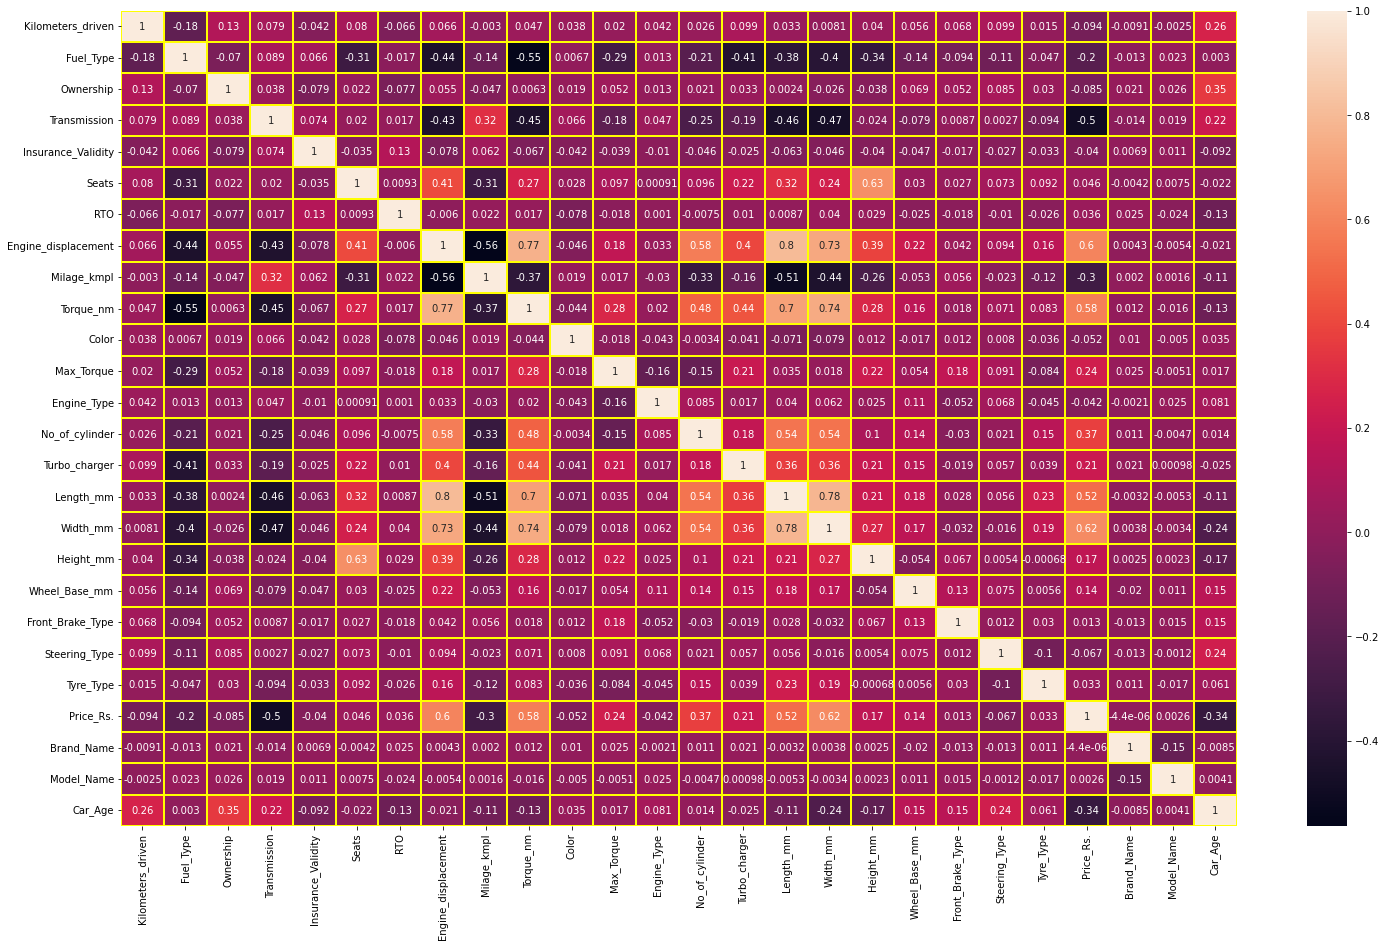

In [143]:
plt.subplots(figsize=(25,15))
sns.heatmap(data.corr(), annot= True, linecolor= "yellow",  linewidths=2)
plt.show()

#### Observations:

Different features are correlated with label. Let's check it.

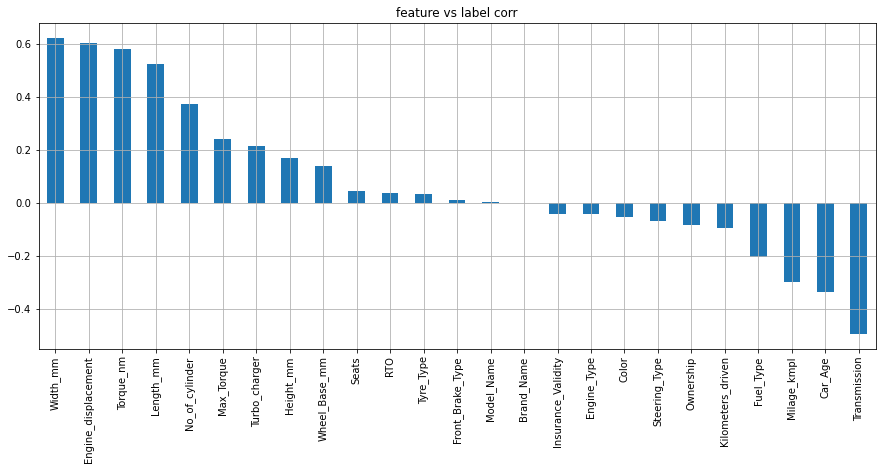

In [144]:
data.drop("Price_Rs.", axis=1).corrwith(data["Price_Rs."]).sort_values(ascending=False).plot(kind='bar',
        figsize=(15,6),grid='True',title='feature vs label corr')
plt.show()

#### Observations:

1. Brand_Name and Model_Name is very less correlated with target variable.
2. Maximum correlation observe in Width and Engine_displacement followed by torque & length.
3. Most of features are moderately & poorly correlated with each other.

### 3. Outliers Detection and Removal:

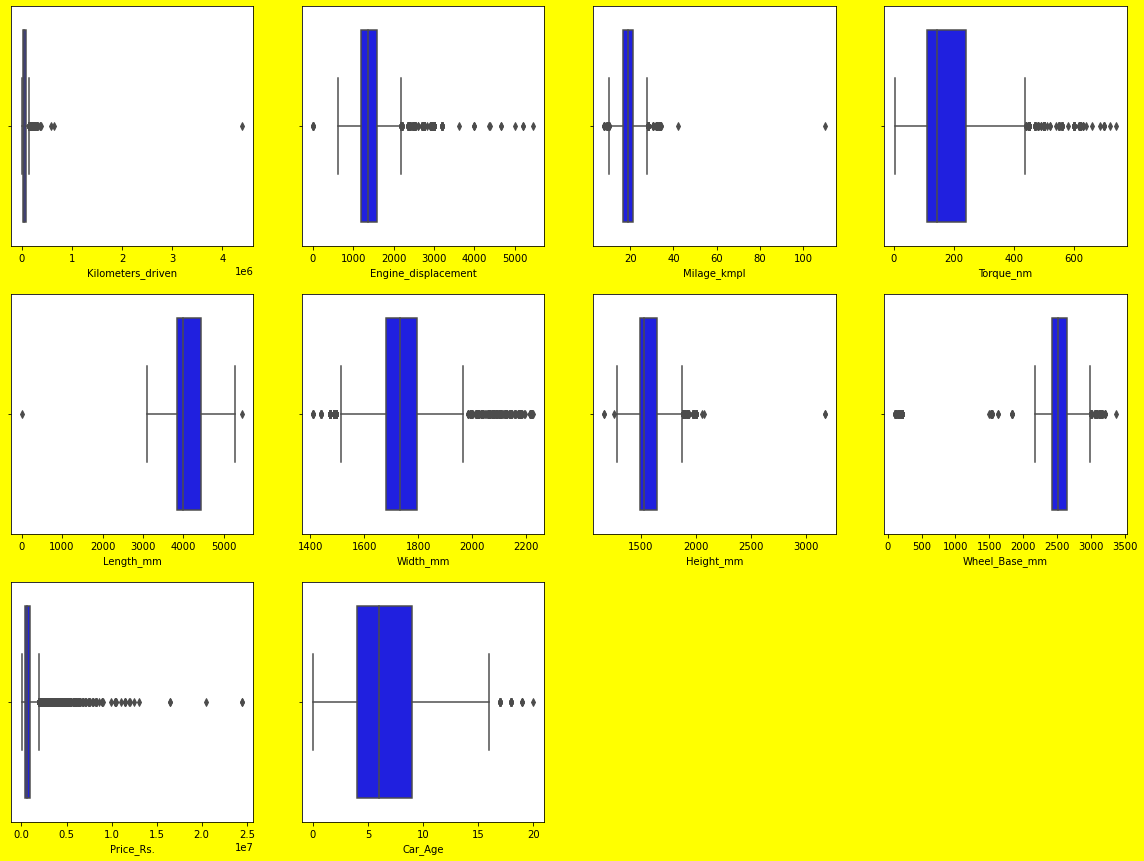

In [136]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for x in Num:
    if plotnumber<=12:
        plt.subplot(3,4,plotnumber)
        sns.boxplot(data[x], color='blue')
        plt.xlabel(x)
    plotnumber+=1
plt.show()

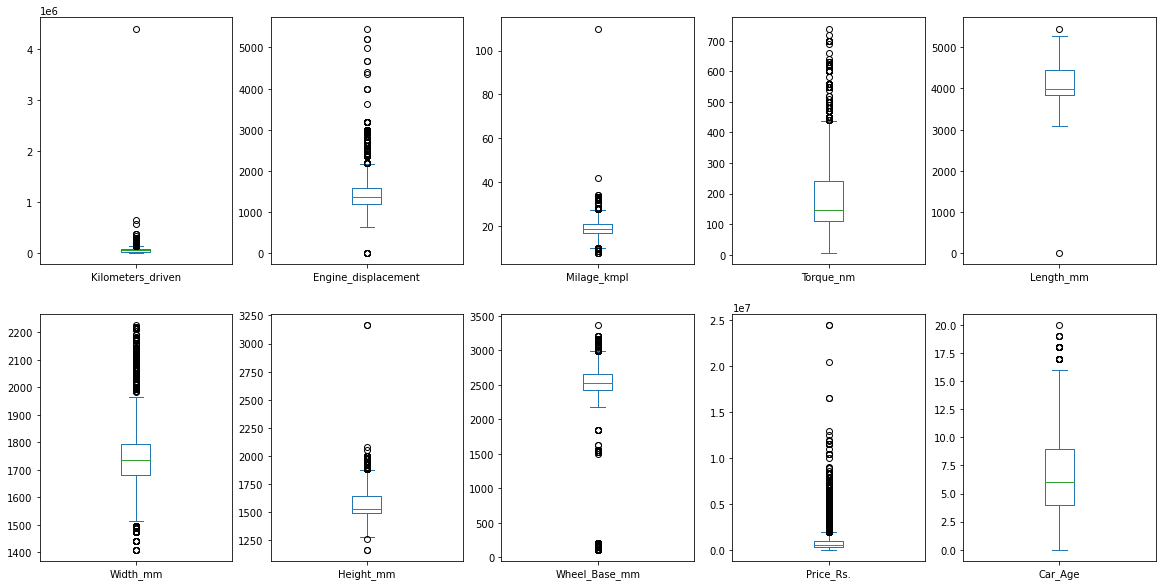

In [139]:
data[Num].plot(kind ='box', subplots =True , layout =(2,5), figsize = (20,10))
plt.show()

#### Observations :

From the previous Boxplot , it is seen that **there are some outiers in numarical featues columns.**
But it is a realistic dataset. So let's keep it.

### Checking Skewness:

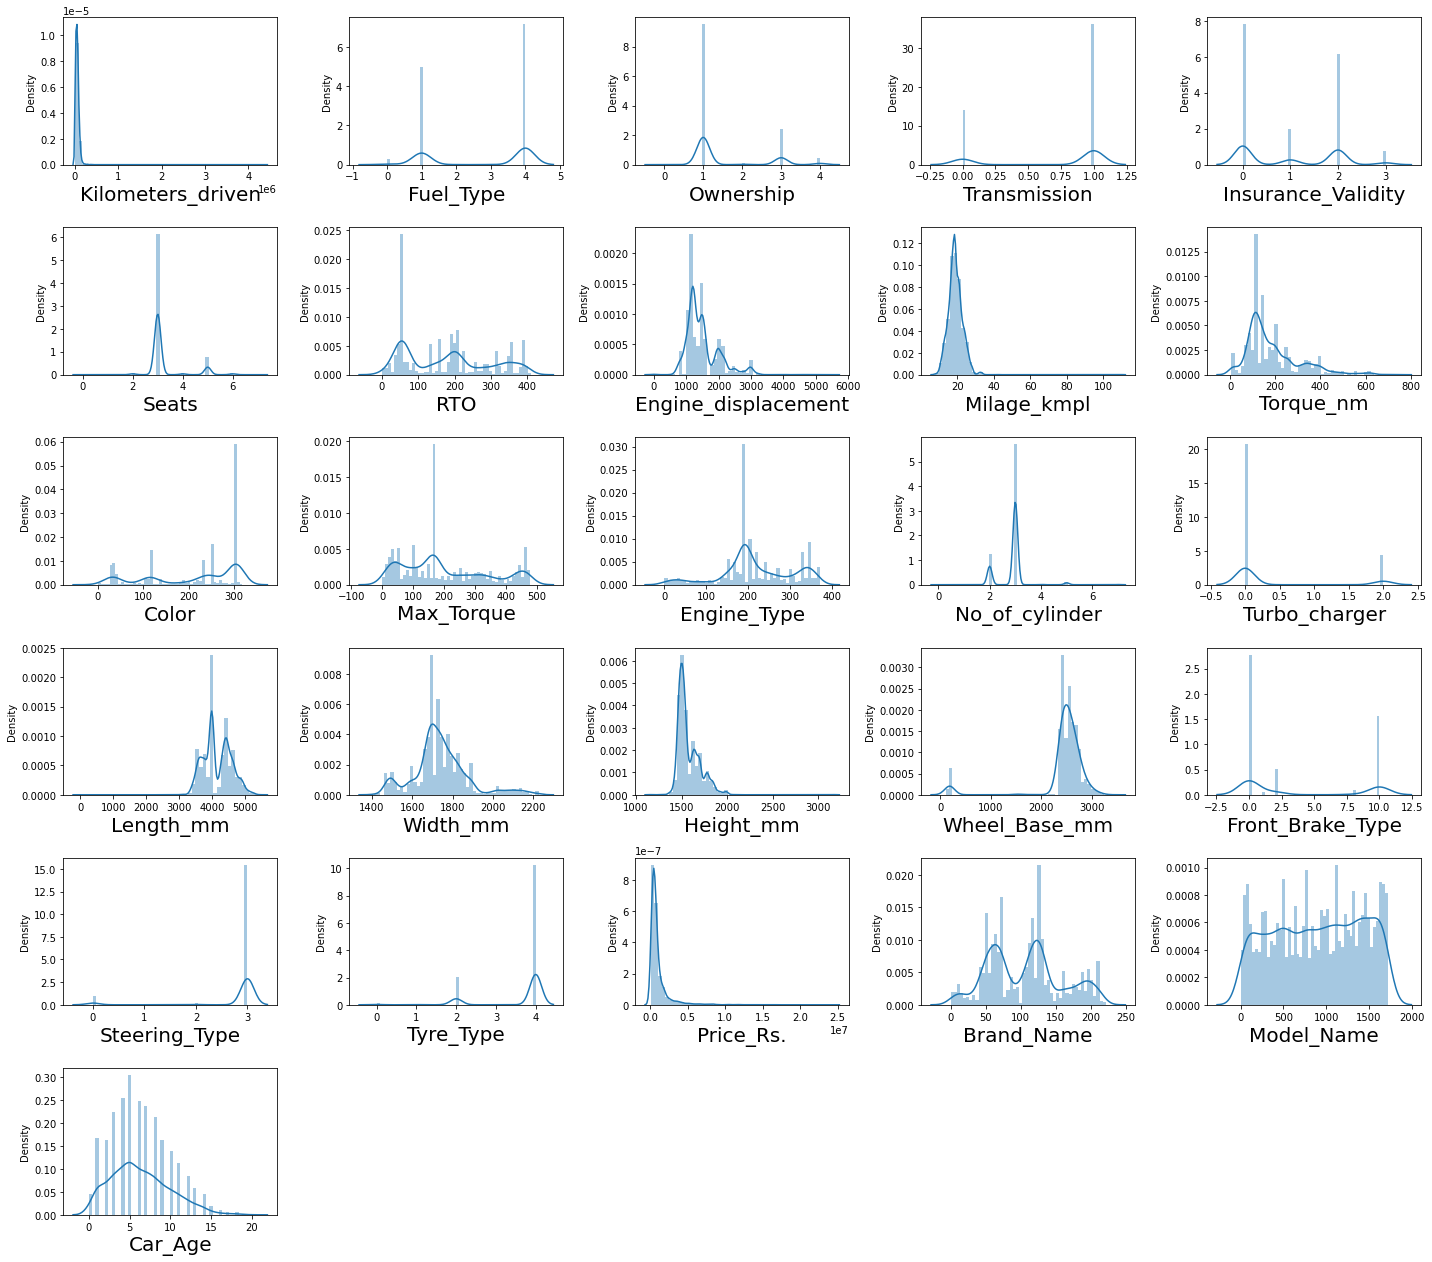

In [146]:
i=0
plt.figure(figsize=(20,20))
for x in data.columns:
    plt.subplot(7,5,i+1)
    sns.distplot(data[x], bins=50)
    plt.xlabel(x,fontsize=20)
    i=i+1
plt.tight_layout()

In [147]:
data.skew().sort_values()

Steering_Type          -3.575885
Wheel_Base_mm          -3.455121
Tyre_Type              -1.994129
Transmission           -0.980712
Color                  -0.642073
Fuel_Type              -0.337037
Engine_Type            -0.236520
Model_Name             -0.088146
Length_mm               0.014992
Brand_Name              0.277935
Insurance_Validity      0.284636
RTO                     0.373113
Car_Age                 0.512818
Max_Torque              0.564779
Front_Brake_Type        0.674043
Width_mm                0.740306
No_of_cylinder          1.319619
Torque_nm               1.394462
Ownership               1.407661
Engine_displacement     1.577337
Turbo_charger           1.715404
Height_mm               1.774869
Seats                   2.192653
Milage_kmpl             2.507329
Price_Rs.               5.768320
Kilometers_driven      43.450125
dtype: float64

#### Observations:

Let's say for this case, the skewness range is -1 to +1.

Any data have skewness above this level, are skewed.

So, skewness is present in some features including target. Let's remove the skewness except Price as it is the target variable.
**Let's use PowerTransformer to transform skewness in features.**

In [149]:
data1= data.copy()

In [151]:
skew_data = ['Kilometers_driven', 'Engine_displacement', 'Milage_kmpl', 'Torque_nm', 'Height_mm','Wheel_Base_mm']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [152]:
data[skew_data] = scaler.fit_transform(data[skew_data].values)
data.head()

,Kilometers_driven,Fuel_Type,Ownership,Transmission,Insurance_Validity,Seats,RTO,Engine_displacement,Milage_kmpl,Torque_nm,Color,Max_Torque,Engine_Type,No_of_cylinder,Turbo_charger,Length_mm,Width_mm,Height_mm,Wheel_Base_mm,Front_Brake_Type,Steering_Type,Tyre_Type,Price_Rs.,Brand_Name,Model_Name,Car_Age
0,0.839032,1,1,1,2,3,57,0.976755,-0.445033,1.357094,89,315,79,3,2,4395.0,1818.0,3.913536e-15,0.440700,0,3,4,1003000.0,80,351,5.0
1,-1.510402,4,1,0,2,3,57,-0.247508,-0.639929,0.744642,183,247,36,3,2,4360.0,1822.0,6.050715e-15,-3.081050,2,3,4,1283000.0,160,1159,1.0
2,0.281247,4,1,0,2,3,57,1.847385,-1.734929,0.590868,117,206,104,3,0,4850.0,1825.0,-4.884981e-15,1.070385,10,3,4,1640000.0,52,1656,6.0
3,0.915401,1,1,1,2,5,57,1.353498,-1.036950,1.239638,305,301,366,3,2,4585.0,1890.0,8.854029e-15,0.721793,1,3,4,780000.0,54,1438,7.0
4,-0.295648,4,1,0,2,3,57,-0.546583,-0.445033,-0.571904,107,24,20,3,0,3989.0,1694.0,-8.049117e-16,0.007102,2,3,4,605000.0,209,70,6.0


In [154]:
data[skew_data].skew().sort_values()

Wheel_Base_mm         -0.831369
Height_mm              0.000000
Milage_kmpl            0.024106
Torque_nm              0.062201
Kilometers_driven      0.220718
Engine_displacement    0.369702
dtype: float64

Overall skewness is removed

### Standard Scaling:

In [155]:
# Splitting data in target and dependent feature
x = data.drop(['Price_Rs.'], axis =1)
y = data['Price_Rs.']

In [160]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [161]:
x_scale = scaler.fit_transform(x)

### Checking Multicollinearity:

In [163]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(x_scale,i)for i in range(x.shape[1])]
vif["Features"] = x.columns
vif

,VIF,Features
0,1.798215,Kilometers_driven
1,2.737703,Fuel_Type
2,1.166469,Ownership
3,1.608833,Transmission
4,1.042029,Insurance_Validity
5,1.986359,Seats
6,1.044799,RTO
7,4.882561,Engine_displacement
8,2.958767,Milage_kmpl
9,2.479886,Torque_nm


#### Observation:

No Multicollinearity is present between different features.


In [164]:
### Importing Final data final for ML learning after Feature Engineering

data.to_excel('Final_Car_Prediction_Data.xlsx', index = False)

## Final predictions using different Regression ML Models :

#### Find best Random state:

In [174]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2_max=0
random_max=0
for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=i)
    lin_reg= LinearRegression()
    
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    
    if r2>r2_max:
        r2_max=r2
        random_max=i
print('Best accuracy is', r2_max ,'on Random_state', random_max)

Best accuracy is 0.6747691673480358 on Random_state 445


In [168]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (4099, 25)
Training target shape: (4099,)
Test feature shape: (1367, 25)
Test target shape: (1367,)


#### Observations:
For random state=445, the accuracy score is best. Lets take this random state for further steps.

### Using LinearRegression()

In [169]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=445)

lin_reg= LinearRegression()

lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6747691673480358
Mean absolute error: 478747.1763771032
Mean square error: 611403923181.5319
Root mean square error: 781923.2207714078


#### Hyperparameter Tuning Using GridSearchCV:

In [170]:
from sklearn.model_selection import GridSearchCV

grid = dict(fit_intercept=['True', 'False'], n_jobs=[1,-1])

grid_lin = GridSearchCV(estimator=lin_reg, param_grid= grid, cv=9)

grid_lin.fit(x_train, y_train)
grid_lin.best_params_

{'fit_intercept': 'True', 'n_jobs': 1}

In [171]:
grid_lin_best = LinearRegression(fit_intercept= 'True', n_jobs= 1)

grid_lin_best.fit(x_train, y_train)
y_pred = grid_lin_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6747691673480358
Mean absolute error: 478747.1763771032
Mean square error: 611403923181.5319
Root mean square error: 781923.2207714078


#### Observations:

No such improvement seen after GridSearchCV.
### Using DecisionTreeRegressor():

In [210]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.8595921262147387
Mean absolute error: 182715.4301389905
Mean square error: 350486438631.18286
Root mean square error: 592018.9512432714


#### Using GridSearchCV:

In [183]:
param = {'criterion' : ["squared_error", "absolute_error"], 'min_samples_split' : range(1,5),
    'splitter' : ["best", "random"], 'max_features':["auto", "sqrt", "log2"],
    'min_samples_leaf' : range(1,5)}

grid_search = GridSearchCV(estimator = dt,cv=5,param_grid = param)
grid_search.fit(x_train, y_train)

print("Best Parameters:" , grid_search.best_params_)

Best Parameters: {'criterion': 'absolute_error', 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'random'}


In [197]:
grid_dt_best = grid_search.best_estimator_
grid_dt_best.fit(x_train, y_train)

y_pred = grid_dt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6901426626889617
Mean absolute error: 219412.45903438187
Mean square error: 773466556469.4764
Root mean square error: 879469.4744386962


#### Observations:

After using Gridseaech CV, R2 is not improved.

### Using KNeighborsRegressor():

In [213]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
rmse_val = []
for i in range(1,20):
    i = i+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)

    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_test) 
    error =np. sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , i , 'is:', error)

RMSE value for k=  2 is: 789256.1919579993
RMSE value for k=  3 is: 821754.9114324929
RMSE value for k=  4 is: 837294.2356732707
RMSE value for k=  5 is: 874920.2844268412
RMSE value for k=  6 is: 887420.2117626896
RMSE value for k=  7 is: 886414.8273790214
RMSE value for k=  8 is: 881257.2501690832
RMSE value for k=  9 is: 885239.4568541993
RMSE value for k=  10 is: 901049.021444554
RMSE value for k=  11 is: 910278.6390743973
RMSE value for k=  12 is: 920758.9326901782
RMSE value for k=  13 is: 930763.2032285426
RMSE value for k=  14 is: 933238.4651661275
RMSE value for k=  15 is: 933757.3284434591
RMSE value for k=  16 is: 940854.781860536
RMSE value for k=  17 is: 947373.805146834
RMSE value for k=  18 is: 956149.1390665028
RMSE value for k=  19 is: 964035.1810702559
RMSE value for k=  20 is: 968013.7266968417


In [214]:
min(rmse_val)

789256.1919579993

#### For k=2 we get the best RMSE value for KNeighborsRegressor()

In [217]:
knn =KNeighborsRegressor(n_neighbors= 2)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7504507667323603
Mean absolute error: 254099.51389904902
Mean square error: 622925336544.0422
Root mean square error: 789256.1919579993


#### Using GridSearchCV

In [218]:
param = {'algorithm' : ['auto', 'ball_tree', 'kd_tree'],
             'leaf_size' : [30,40,25],
             'n_neighbors' : [2],'weights': ['uniform', 'distance'], 'p':[1,2,3]}

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, cv=5)

gridsearchknn.fit(x_train, y_train)

print("Best Parameters:" , gridsearchknn.best_params_)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}


In [221]:
grid_knn_best = gridsearchknn.best_estimator_

grid_knn_best.fit(x_train, y_train)

y_pred = grid_knn_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7997598643183639
Mean absolute error: 202716.2524865619
Mean square error: 499839860358.66095
Root mean square error: 706993.5362919953


#### Observations:

Nothing is improved after GridSearchCV.

### Using RandomForestRegressor():

In [223]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.870623012523412
Mean absolute error: 149848.62629114848
Mean square error: 322951116337.32587
Root mean square error: 568287.881568247


#### Using GridSearchCV:

In [250]:
params = {'n_estimators' : [100,110,80], 'criterion' : ["squared_error", "absolute_error"]}

rf_grd = GridSearchCV(rf, param_grid = params)
rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'absolute_error', 'n_estimators': 110}


In [252]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.8583488471373917
Mean absolute error: 157171.02845647404
Mean square error: 353589914556.6887
Root mean square error: 594634.2695781069


#### Observations:

r2 score, RMSE is not improved after GridSearchCV.

### Using Support Vector Regression():

In [225]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train, y_train)

y_pred = svr_rbf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: -0.0643397829885024
Mean absolute error: 647641.818277414
Mean square error: 2656807271390.2466


In [226]:
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly')
svr_poly.fit(x_train, y_train)

y_pred = svr_poly.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: -0.0640842713728571
Mean absolute error: 647591.5552525278
Mean square error: 2656169462741.898


In [227]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train, y_train)

y_pred = svr_lin.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: -0.053846181602811294
Mean absolute error: 639056.3895765635
Mean square error: 2630613120884.762


#### Observations:


r2 score is very poor after using svm. So let's drop this.

### Using GradientBoostingRegressor()

In [228]:
from sklearn.ensemble import  GradientBoostingRegressor

gbdt= GradientBoostingRegressor()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9106339819187068
Mean absolute error: 168473.91282115385
Mean square error: 223075647879.0166
Root mean square error: 472308.8479787528


#### Using GridSearchCV:

In [229]:
params = {'loss': ['squared_error', 'absolute_error'], 'n_estimators':[100,120,80],
          'criterion':['squared_error', 'mse'],'max_features': ['auto', 'sqrt']}

gbdt_grd = GridSearchCV(gbdt, param_grid = params, cv=5)
gbdt_grd.fit(x_train, y_train)
print('best params : ', gbdt_grd.best_params_)

best params :  {'criterion': 'squared_error', 'loss': 'squared_error', 'max_features': 'auto', 'n_estimators': 120}


In [236]:
grid_gbdt_best = gbdt_grd.best_estimator_

grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9189617287207444
Mean absolute error: 161670.50052482125
Mean square error: 202287908275.9488
Root mean square error: 449764.2807915595


#### Observations:

r2 score, RMSE are slightly improved after GridSearchCV.
### Using AdaBoostRegressor():

In [237]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6626150536634019
Mean absolute error: 678031.304334998
Mean square error: 842181033737.0099
Root mean square error: 917704.2190907754


#### Using GridSearchCV:

In [238]:
params = { 'loss' : ['linear', 'square'], 'learning_rate': [0.1,0.001,1,0.01] ,
        'n_estimators':[50,60,40] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)
ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 50}


In [249]:
grid_ada_best = ada_grd.best_estimator_

grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7835441916593812
Mean absolute error: 344376.45776954875
Mean square error: 540317457569.1136
Root mean square error: 735062.8936146304


#### Observations:

r2 score, RMSE are improved after GridSearchCV.

#### As per 7 different regression model we can see that the model with maximum R2 score and minimum RMSE value is GradientBoostingRegressor().

Let's check the cross validation score before final prediction.

### Cross Validation:

In [253]:
from sklearn.model_selection import cross_val_score

all_models = [lin_reg , dt , grid_knn_best , rf , grid_gbdt_best, grid_ada_best]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv = 5)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LinearRegression()

 Cross Validation Score :  [0.578421   0.61487744 0.53299728 0.4531912  0.61453618]

Mean CV Score : 0.5588046194604527

Std deviation : 0.060753903187693255

-----------
-----------
Cross Validation Score of : DecisionTreeRegressor()

 Cross Validation Score :  [0.79236302 0.75883849 0.8522489  0.69667993 0.88911918]

Mean CV Score : 0.7978499022700518

Std deviation : 0.06793628147444102

-----------
-----------
Cross Validation Score of : KNeighborsRegressor(n_neighbors=2, p=1, weights='distance')

 Cross Validation Score :  [0.74995097 0.82786153 0.73120105 0.7871832  0.82423297]

Mean CV Score : 0.7840859449254517

Std deviation : 0.038729024500220706

-----------
-----------
Cross Validation Score of : RandomForestRegressor()

 Cross Validation Score :  [0.86431915 0.93406506 0.89553218 0.75837846 0.91964822]

Mean CV Score : 0.8743886138904102

Std deviation : 0.06263626566825932

-----------
-----------
Cross Validation Score of :

#### Observations:

Here GradientBoostingRegressor() is the best model with max cv score and min std.

In [254]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
#LASSO Regression
lassocv= LassoCV()
lassocv.fit(x_train, y_train)
alpha= lassocv.alpha_   #best learning rate for LASSO
alpha  

8862.233170103065

In [255]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", lasso_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.5486567922109651


In [256]:
#RIDGE Regression

ridgecv= RidgeCV(alphas=np.arange(0.0001, 1.0, 0.001),  normalize= True, cv=10 )
ridgecv.fit(x_train, y_train)
alpha= ridgecv.alpha_   #best learning rate for RIDGE
alpha  

0.1061

In [257]:
ridge_reg=Ridge(alpha)
ridge_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", ridge_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.5588151520297842


After using LASSO() and Ridge(), there is no large change in score. So this model is not ***OVERFITTED***

### Our final model is GradientBoostingRegressor() for this particular dataset.

## Finalizing Model:

In [258]:
y_pred = grid_gbdt_best.predict(x_test)
y_pred

array([1040482.93852642, 1513892.06606559, 1718294.65923096, ...,
        377041.31282705, 4465253.92820718,  293447.76873334])

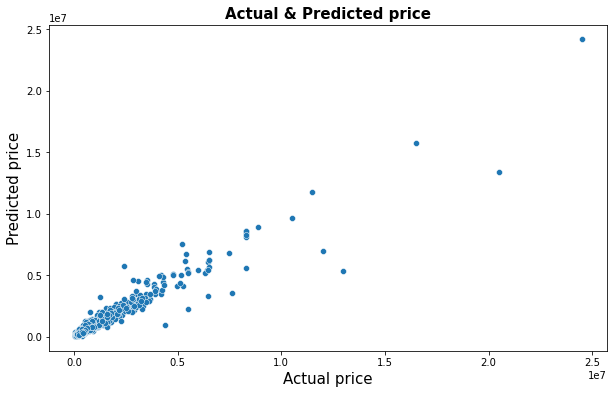

In [260]:
# Let's visualize the variation of actual test data and predicted data
plt.figure(figsize=(10,6))
sns.scatterplot(y_test.round(2), y_pred)
plt.xlabel("Actual price", fontsize= 15)
plt.ylabel("Predicted price",fontsize= 15)
plt.title("Actual & Predicted price" , fontsize= 15, fontweight= 'bold')
plt.show()

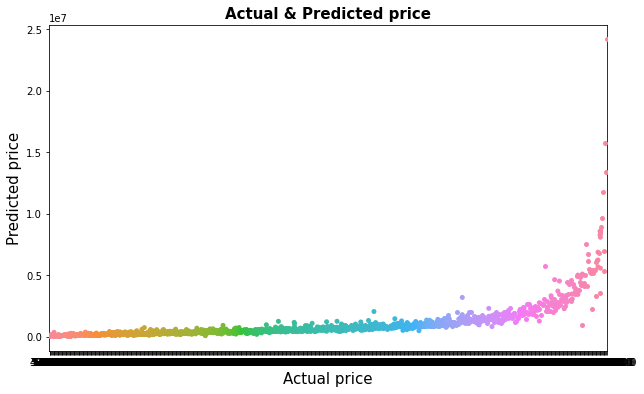

In [261]:
# Let's visualize the variation of actual test data and predicted data
plt.figure(figsize=(10,6))
sns.swarmplot(y_test.round(2), y_pred)
plt.xlabel("Actual price", fontsize= 15)
plt.ylabel("Predicted price",fontsize= 15)
plt.title("Actual & Predicted price" , fontsize= 15, fontweight= 'bold')
plt.show()

In [263]:
print('Final R2 Score:', r2_score(y_test, y_pred))
print('\nFinal Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('\nFinal Mean square error:', mean_squared_error(y_test, y_pred))
print('\nFinal Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

Final R2 Score: 0.9189617287207444

Final Mean absolute error: 161670.50052482125

Final Mean square error: 202287908275.9488

Final Root mean square error: 449764.2807915595


In [264]:
feature= x.columns
feature

Index(['Kilometers_driven', 'Fuel_Type', 'Ownership', 'Transmission',
       'Insurance_Validity', 'Seats', 'RTO', 'Engine_displacement',
       'Milage_kmpl', 'Torque_nm', 'Color', 'Max_Torque', 'Engine_Type',
       'No_of_cylinder', 'Turbo_charger', 'Length_mm', 'Width_mm', 'Height_mm',
       'Wheel_Base_mm', 'Front_Brake_Type', 'Steering_Type', 'Tyre_Type',
       'Brand_Name', 'Model_Name', 'Car_Age'],
      dtype='object')

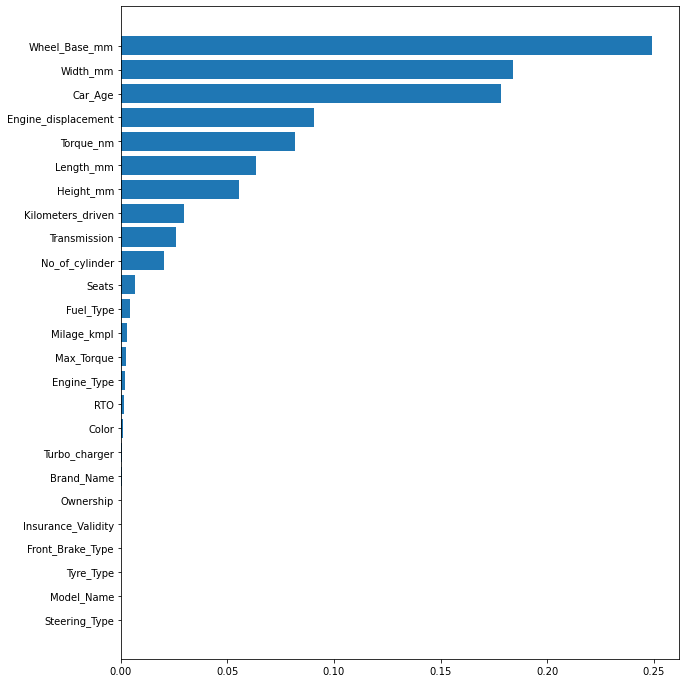

In [266]:
fimp = list(zip(feature,grid_gbdt_best.feature_importances_))
fimp.sort(key = lambda x : x[1])
plt.figure(figsize=(10,12))
plt.barh([x[0] for x in fimp],[x[1] for x in fimp])

plt.show()

##Result

1. Wheel base, width are the most important feature for predicting price.
2. Interestingly Brand name, model name, steering type is the less importance feature.

### saving the model

save the model for future reference

In [267]:
import pickle
pickle.dump(grid_gbdt_best, open("Car_Price_Regression_model", "wb"))
load_Car_Price_Regression_model= pickle.load(open("Car_Price_Regression_model", "rb"))

In [268]:
y_pred = load_Car_Price_Regression_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=5)

,Predicted Values,Actual Values
800,1.553438e+05,132000.0
882,3.202186e+05,225000.0
626,1.200696e+06,1210000.0
460,9.637285e+04,96582.0
1150,5.633137e+05,506000.0


# Thank you!!